# 데이터 분석

### 출처
o 코드 : https://github.com/AcornPublishing/mlops-mlflow/blob/main/BeginningMLOpswithMLFlow_code.zip

o 데이터 : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bamboolib as bam
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
import io
import pandas as pd

# df = pd.read_csv(io.StringIO(uploaded['creditcard.csv'].decode('utf-8')))
df = pd.read_csv('creditcard.csv')

In [4]:
df

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [5]:
df.head()

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.shape

(284807, 31)

In [9]:
anomalies = df[df.Class == 1]
normal = df[df.Class == 0]

In [10]:
print(f"Anomalies: {anomalies.shape}")
print(f"Normal: {normal.shape}")

Anomalies: (492, 31)
Normal: (284315, 31)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_26368\2027214976.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_counts = pd.value_counts(df['Class'], sort = True)


Text(0, 0.5, 'Counts')

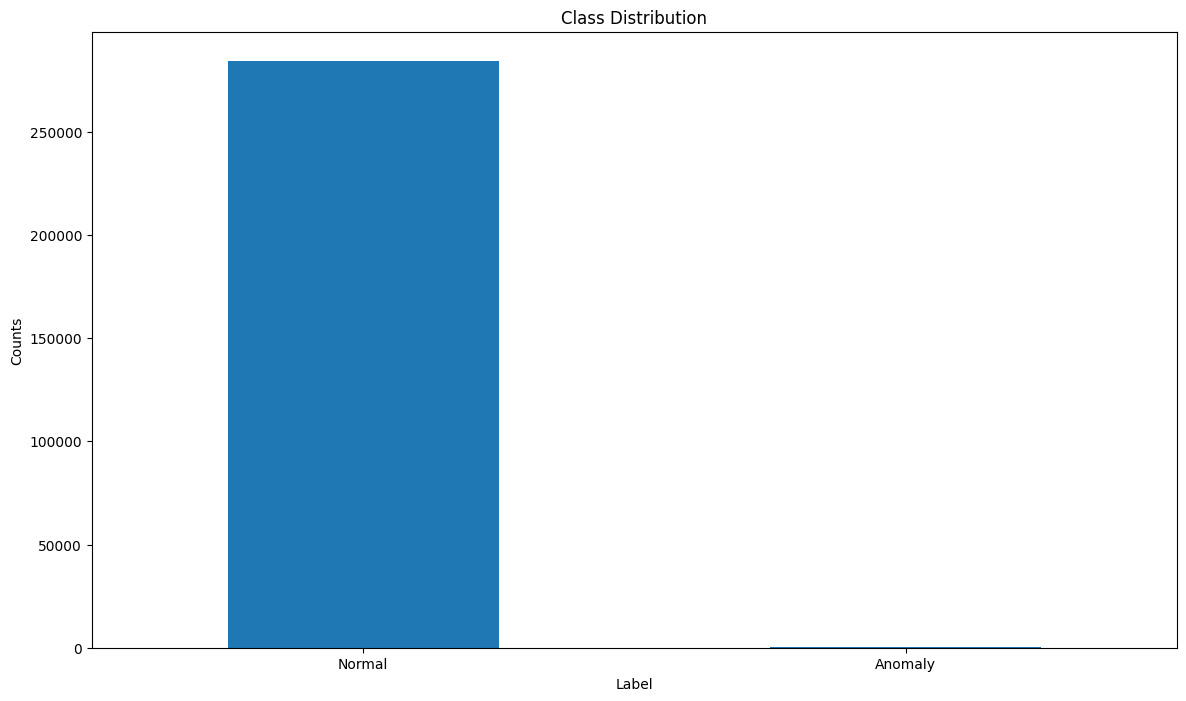

In [11]:
class_counts = pd.value_counts(df['Class'], sort = True)
class_counts.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), ["Normal", "Anomaly"]) 
plt.xlabel("Label")
plt.ylabel("Counts")

In [14]:
anomalies.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
def plot_histogram(df, bins, column, log_scale=False):
  bins = 100
  anomalies = df[df.Class == 1]
  normal = df[df.Class == 0]
  fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
  fig.suptitle(f'Counts of {column} by Class')
  ax1.hist(anomalies[column], bins = bins, color="red")
  ax1.set_title('Anomaly')
  ax2.hist(normal[column], bins = bins, color="orange")
  ax2.set_title('Normal')
  plt.xlabel(f'{column}') 
  plt.ylabel('Count')
  if log_scale:
    plt.yscale('log')
  plt.xlim((np.min(df[column]), np.max(df[column])))
  plt.show()

In [24]:
def plot_scatter(df, x_col, y_col, sharey = False):
  anomalies = df[df.Class == 1]
  normal = df[df.Class == 0]
  fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=sharey)
  fig.suptitle(f'{y_col} over {x_col} by Class')
  ax1.scatter(anomalies[x_col], anomalies[y_col], color='red') 
  ax1.set_title('Anomaly')
  ax2.scatter(normal[x_col], normal[y_col], color='orange')
  ax2.set_title('Normal')
  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.show()

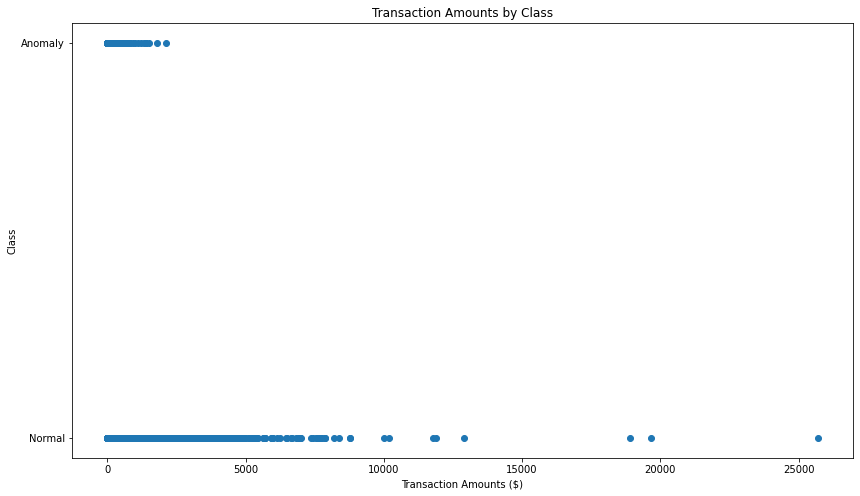

In [25]:
plt.scatter(df.Amount, df.Class)
plt.title("Transaction Amounts by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Transaction Amounts ($)")
plt.show()

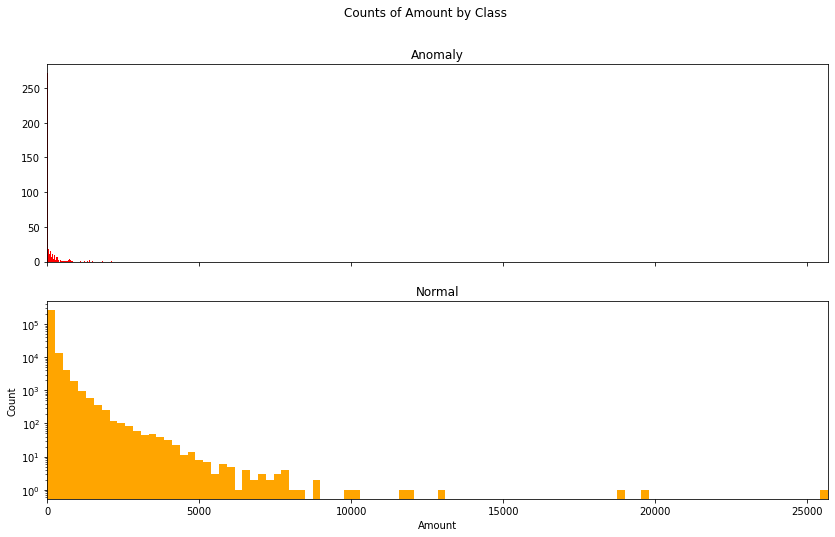

In [26]:
bins = 100
plot_histogram(df, bins, "Amount", log_scale=True)

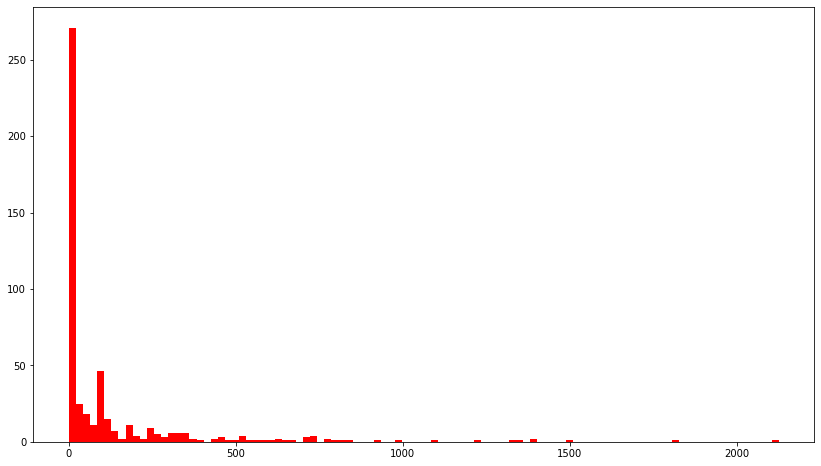

In [27]:
plt.hist(anomalies.Amount, bins = bins, color="red")
plt.show()

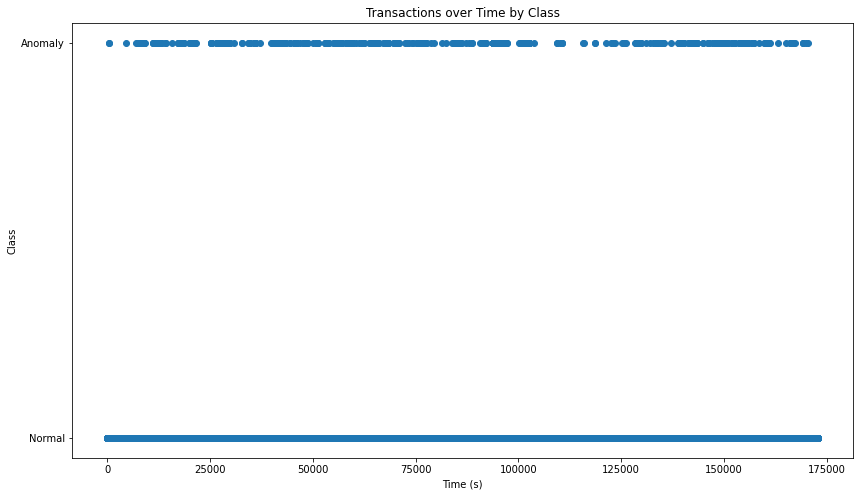

In [28]:
plt.scatter(df.Time, df.Class)
plt.title("Transactions over Time by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Time (s)")
plt.show()

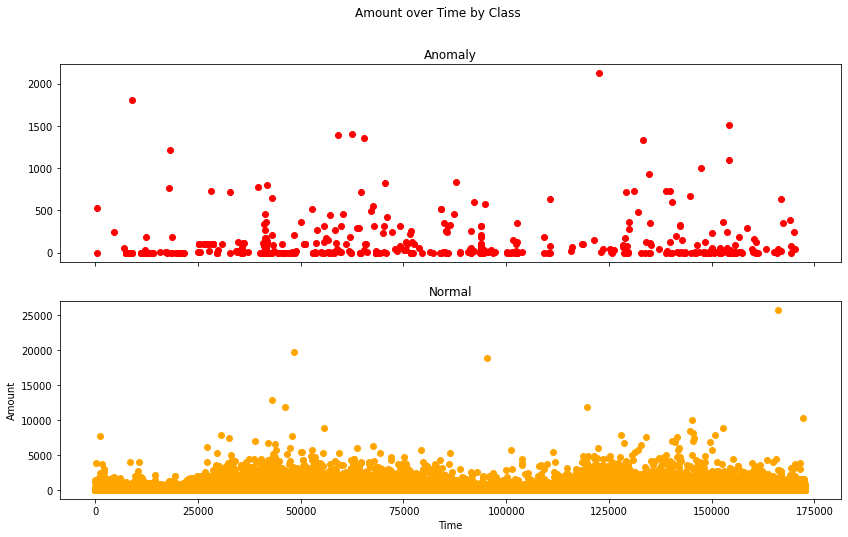

In [29]:
plot_scatter(df, "Time", "Amount")

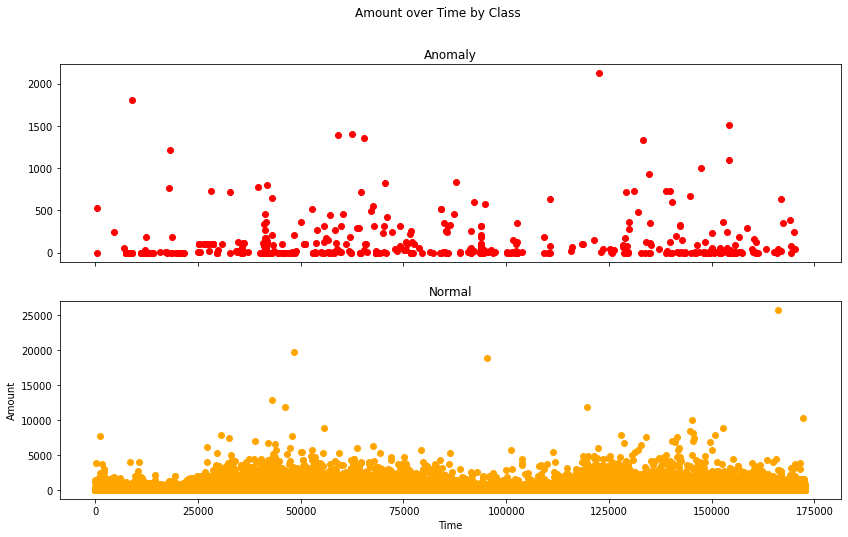

In [30]:
plot_scatter(df, "Time", "Amount")

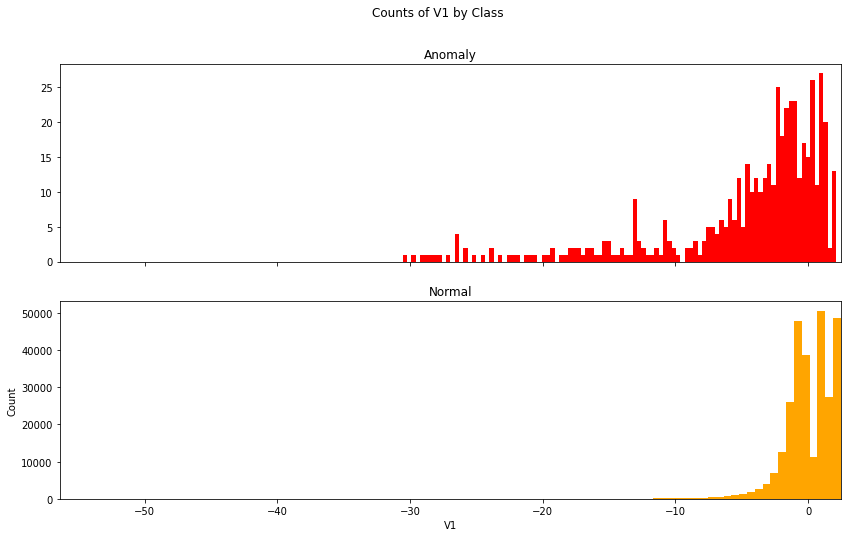

In [31]:
plot_histogram(df, bins, "V1")

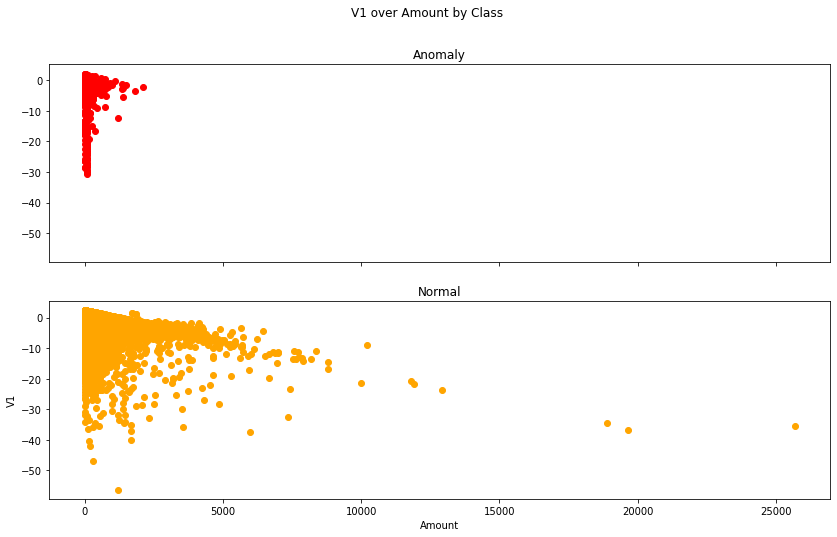

In [32]:
plot_scatter(df, "Amount", "V1", sharey=True)

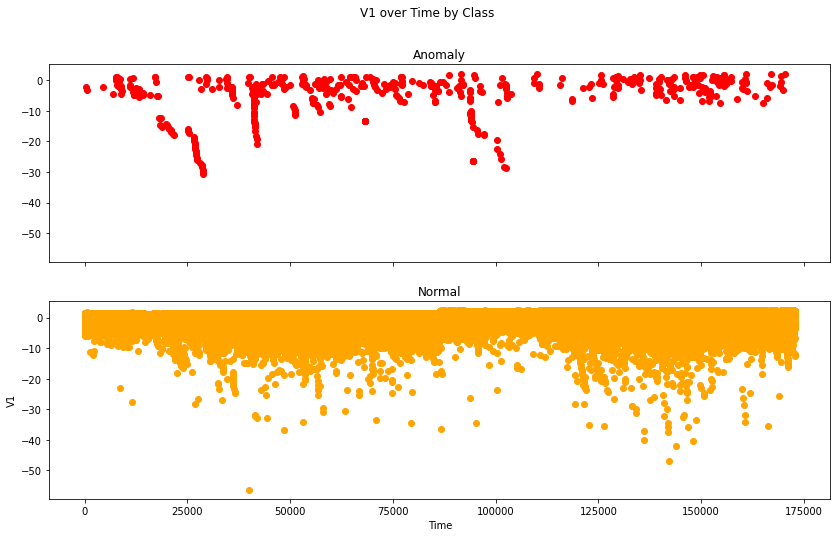

In [33]:
plot_scatter(df, "Time", "V1", sharey=True)

V1 Counts


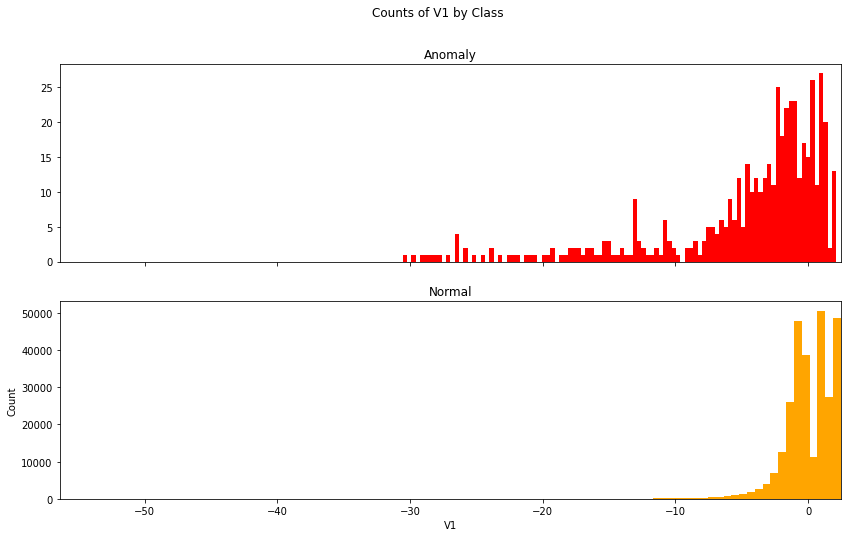

V2 Counts


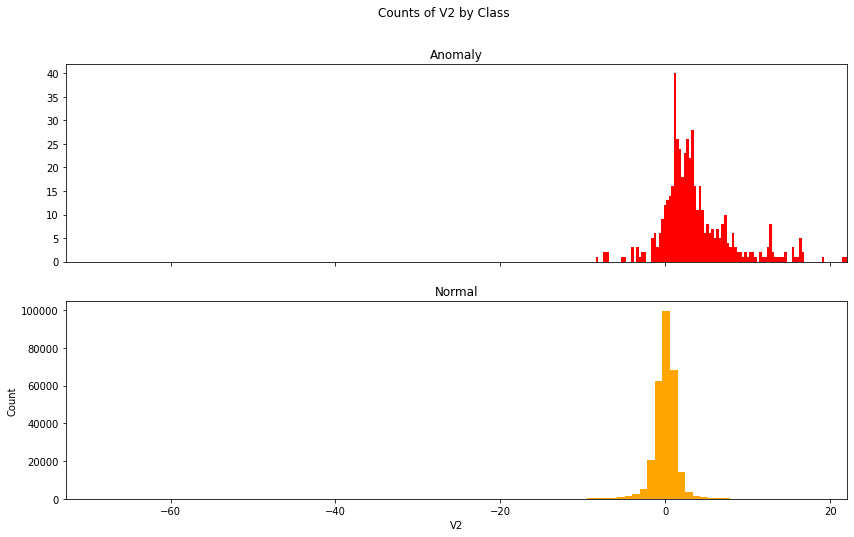

V3 Counts


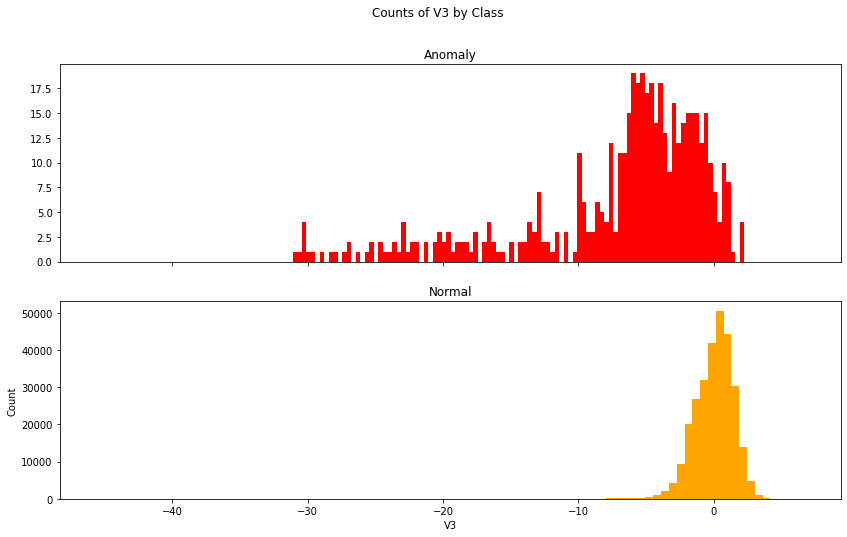

V4 Counts


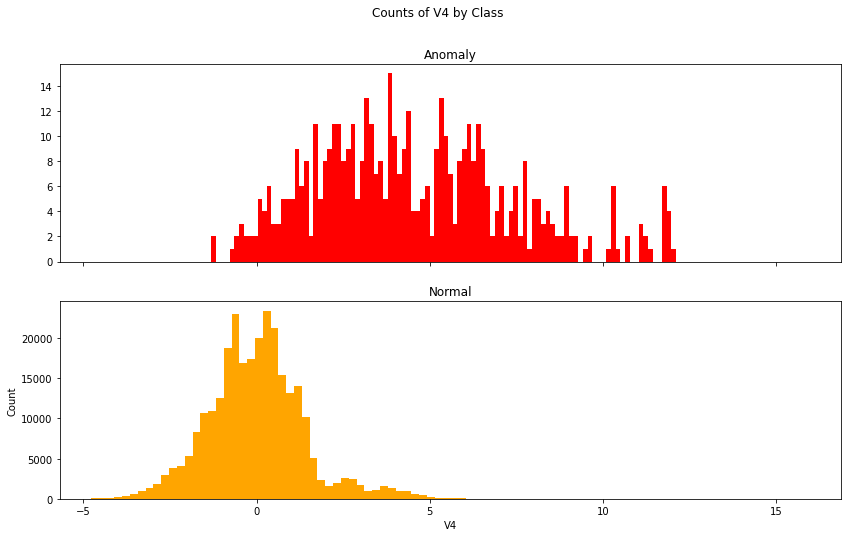

V5 Counts


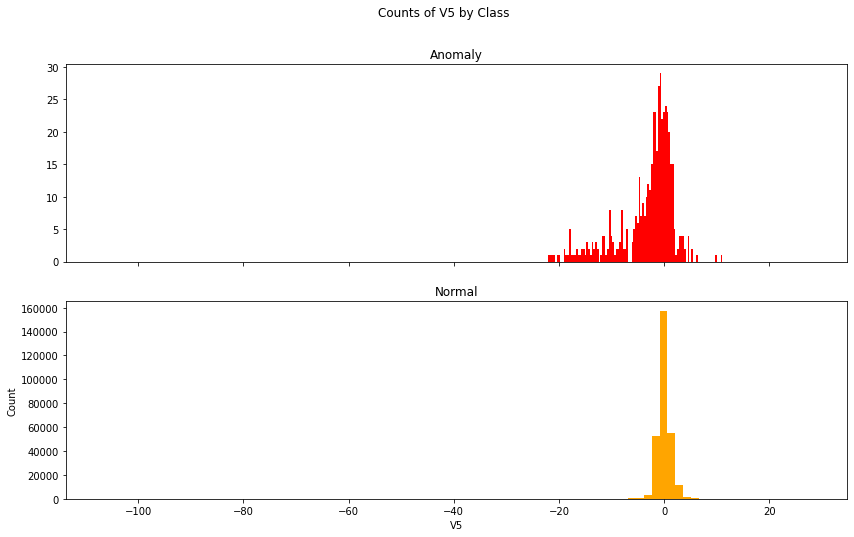

V6 Counts


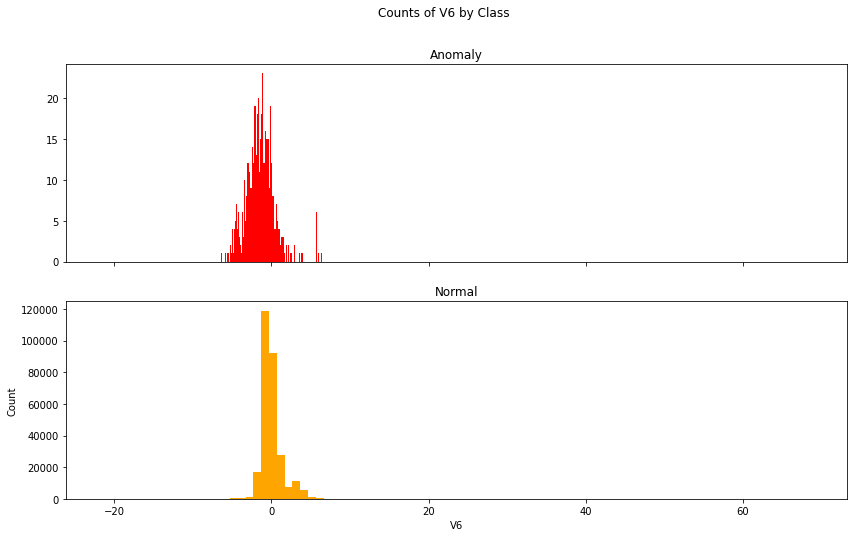

V7 Counts


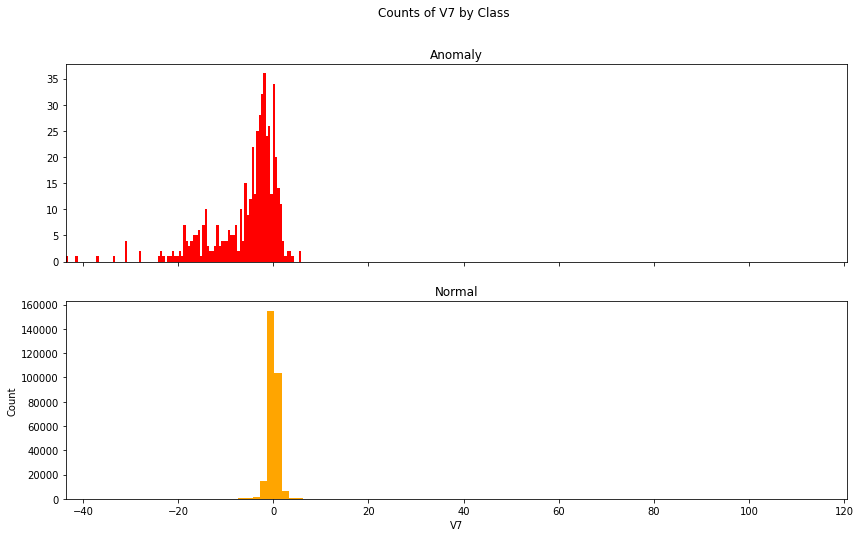

V8 Counts


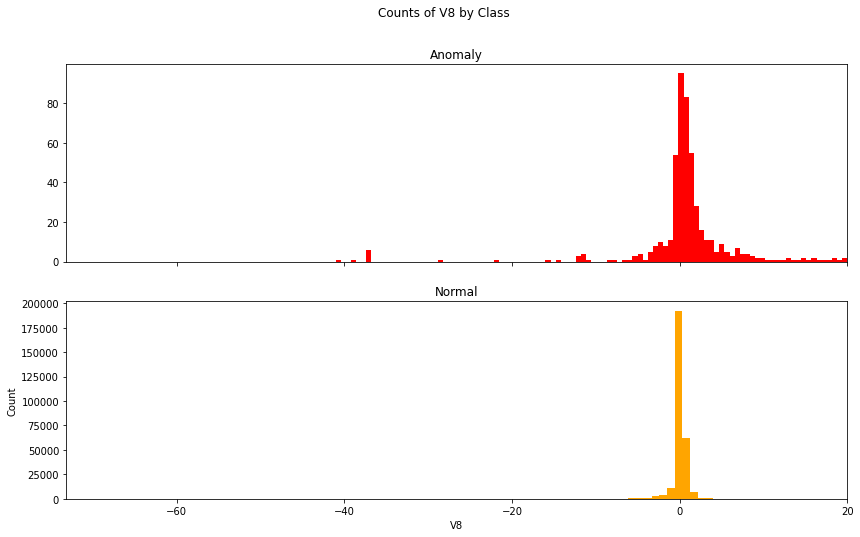

V9 Counts


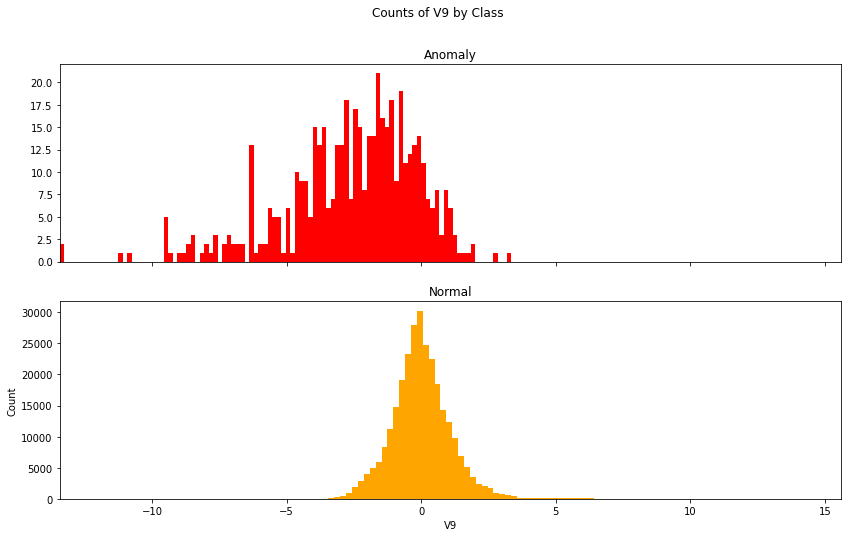

V10 Counts


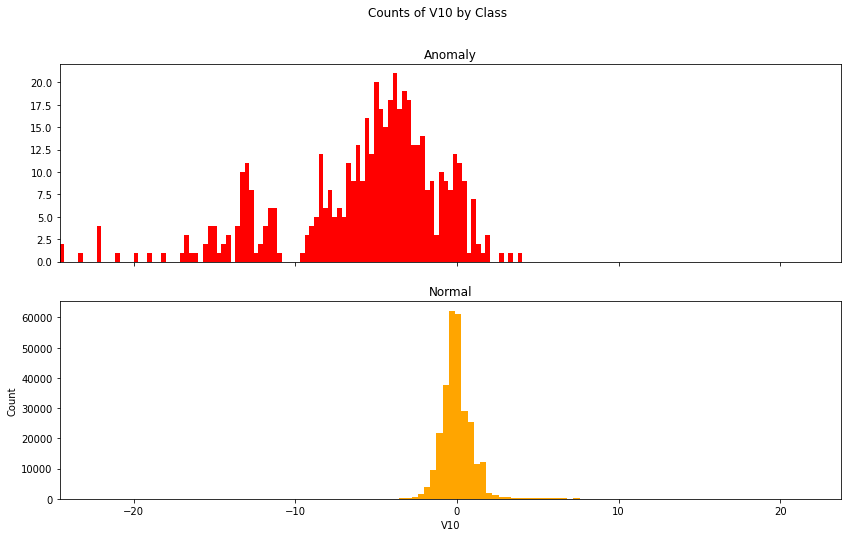

V11 Counts


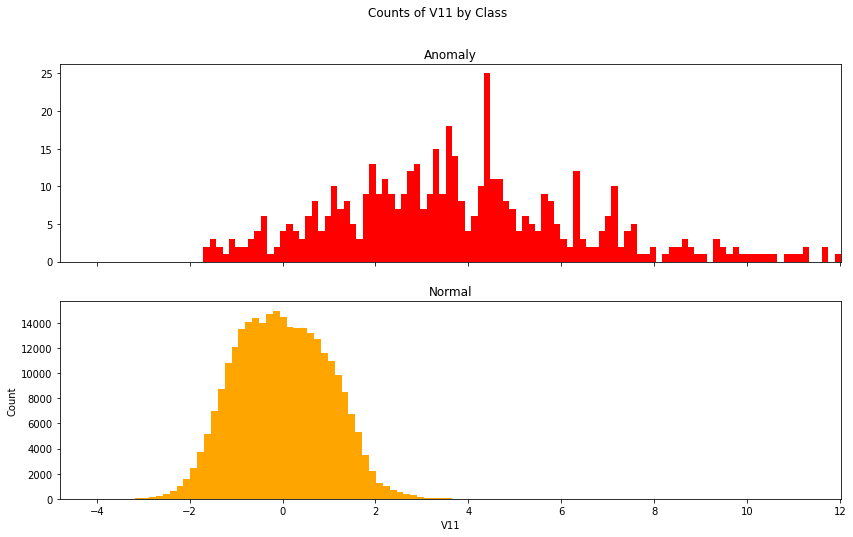

V12 Counts


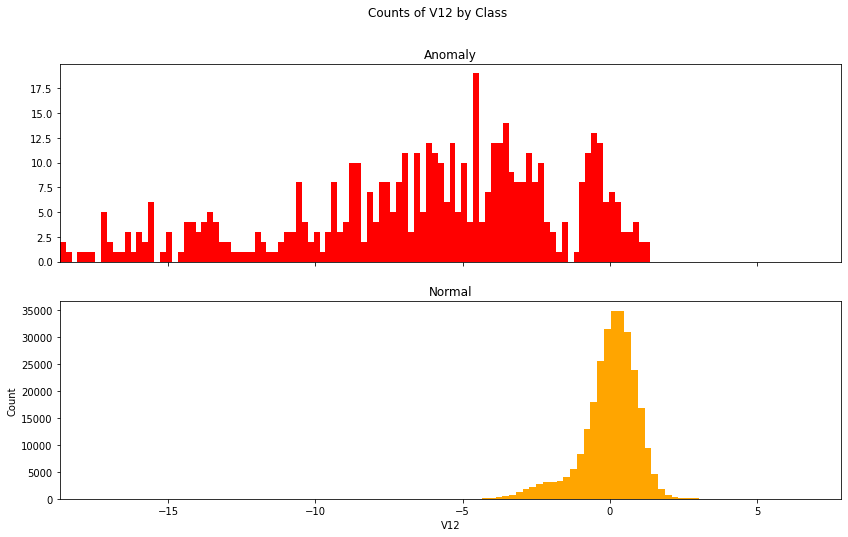

V13 Counts


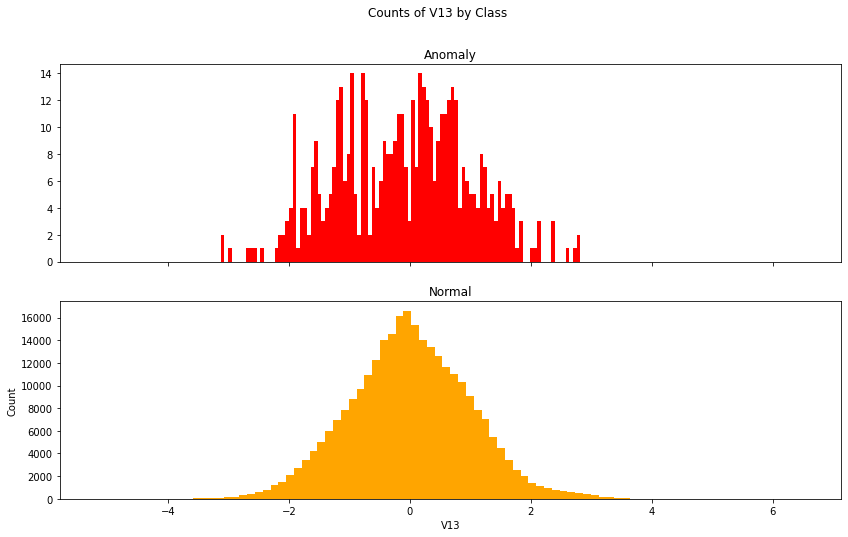

V14 Counts


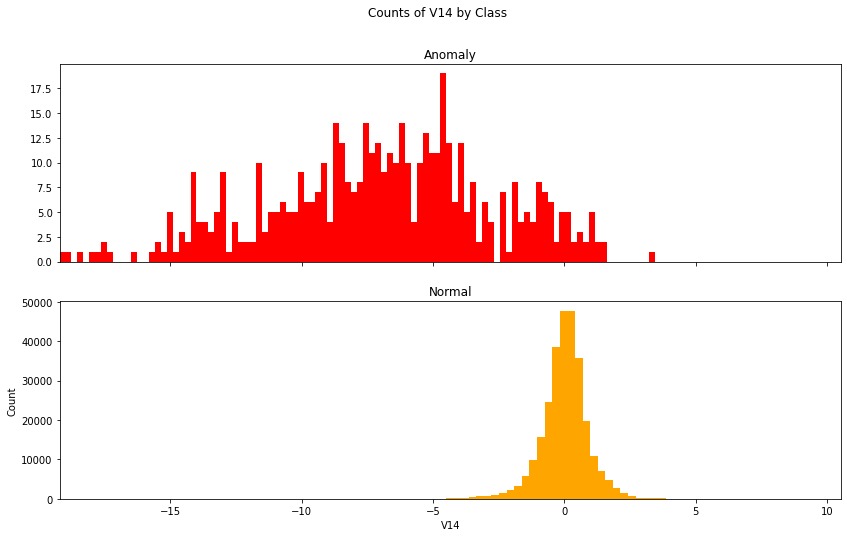

V15 Counts


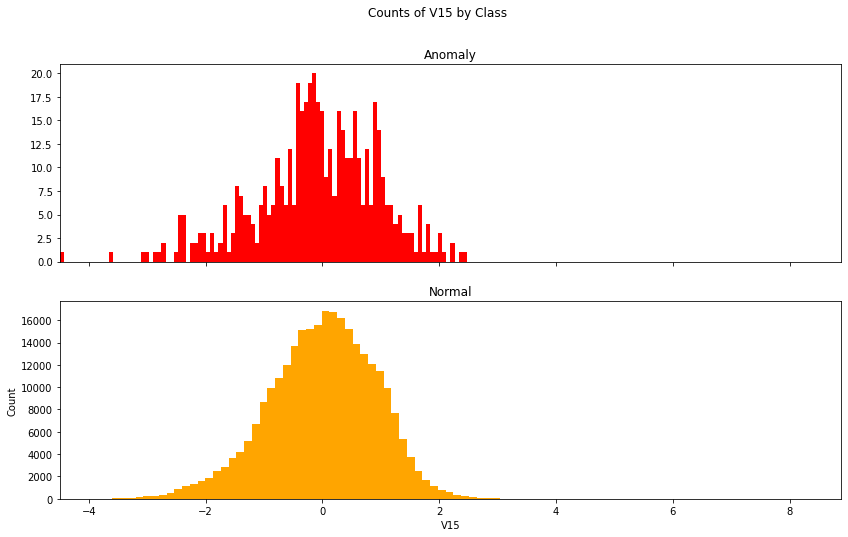

V16 Counts


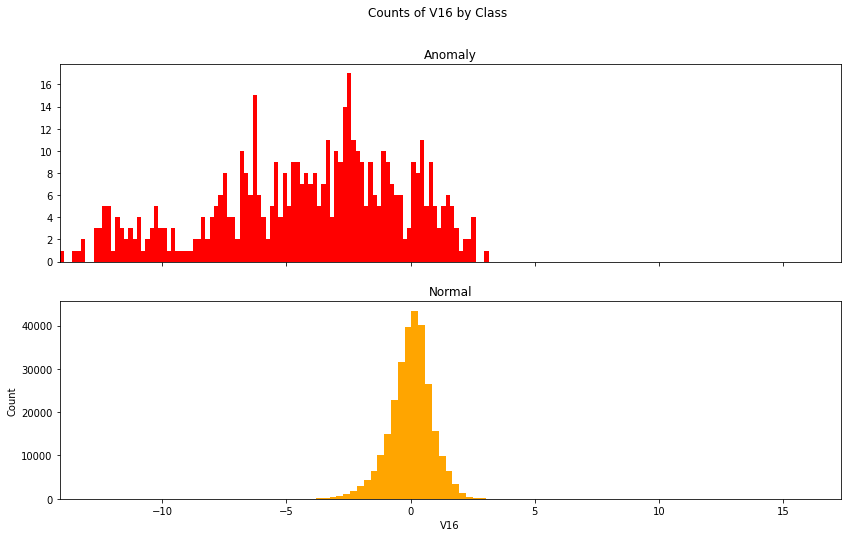

V17 Counts


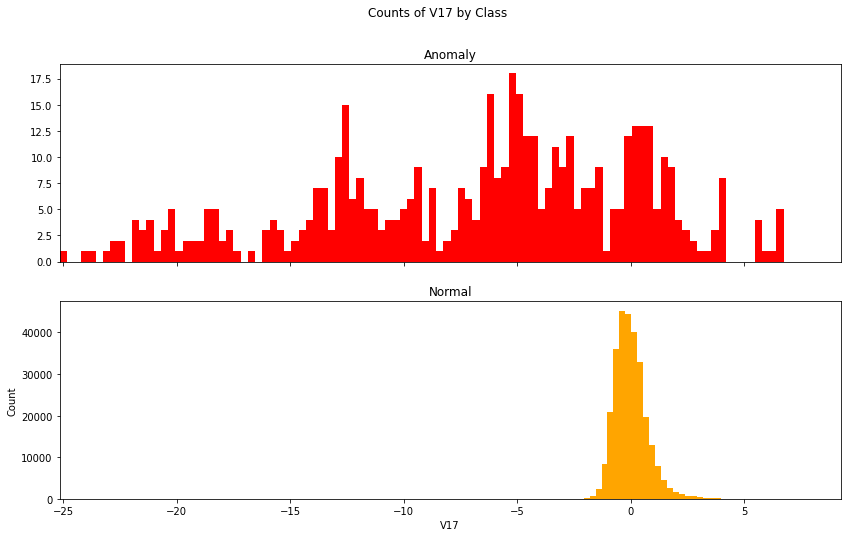

V18 Counts


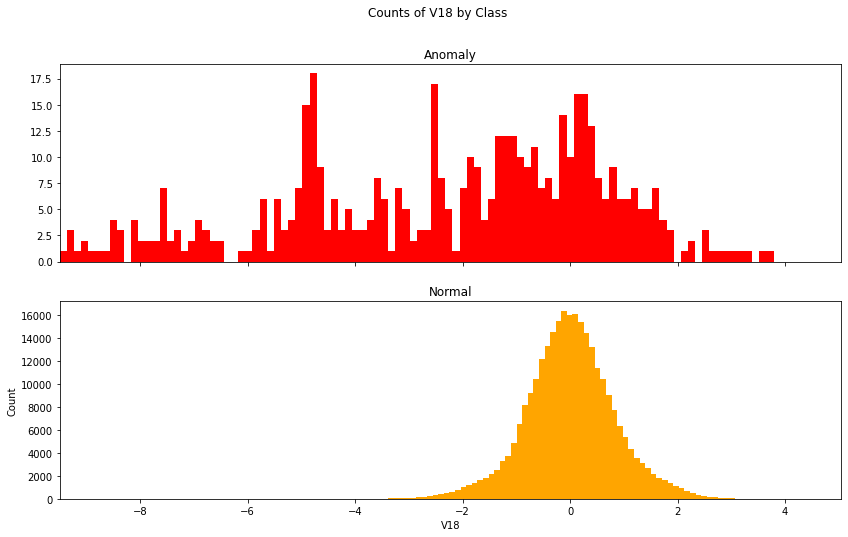

V19 Counts


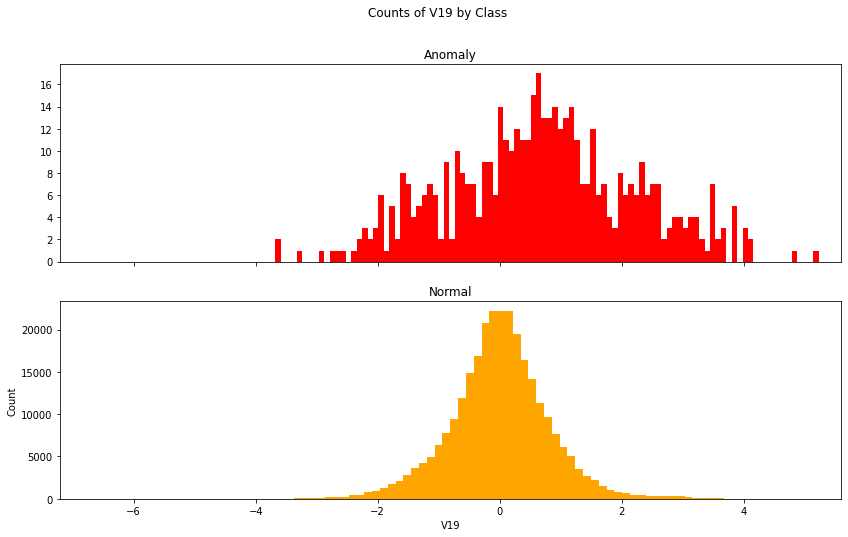

V20 Counts


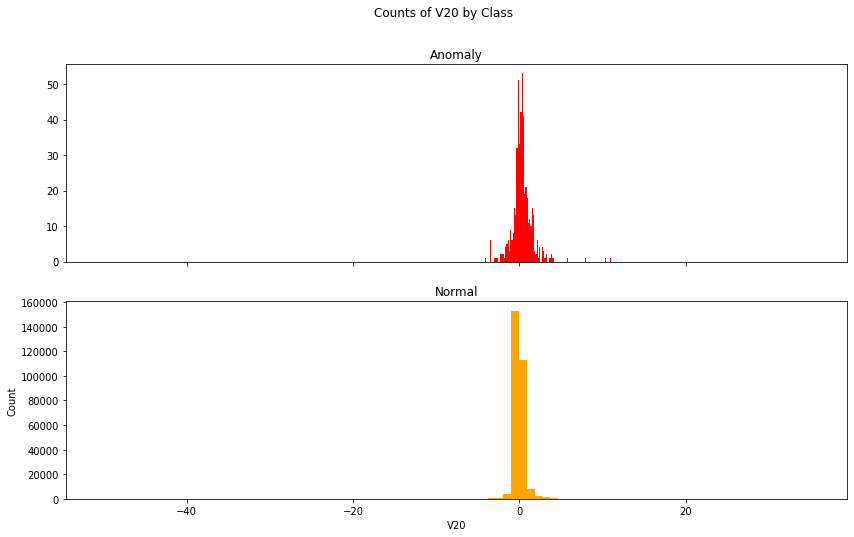

V21 Counts


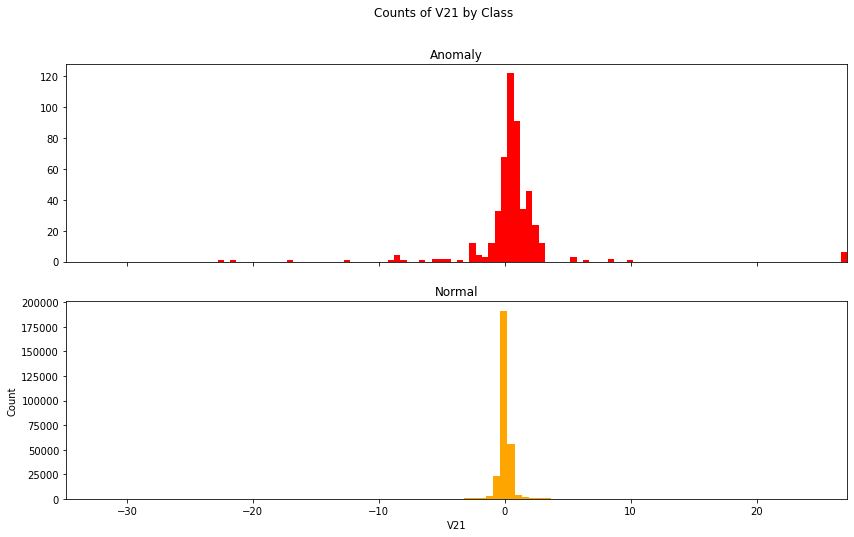

V22 Counts


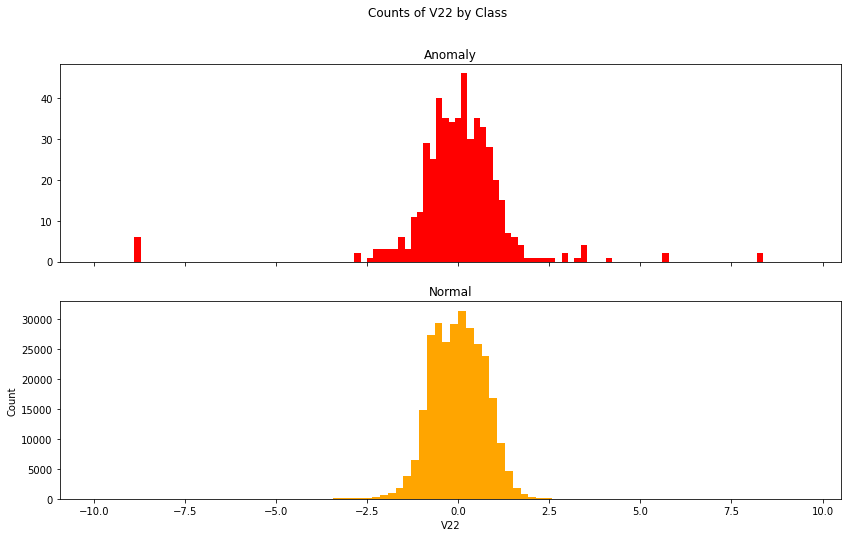

V23 Counts


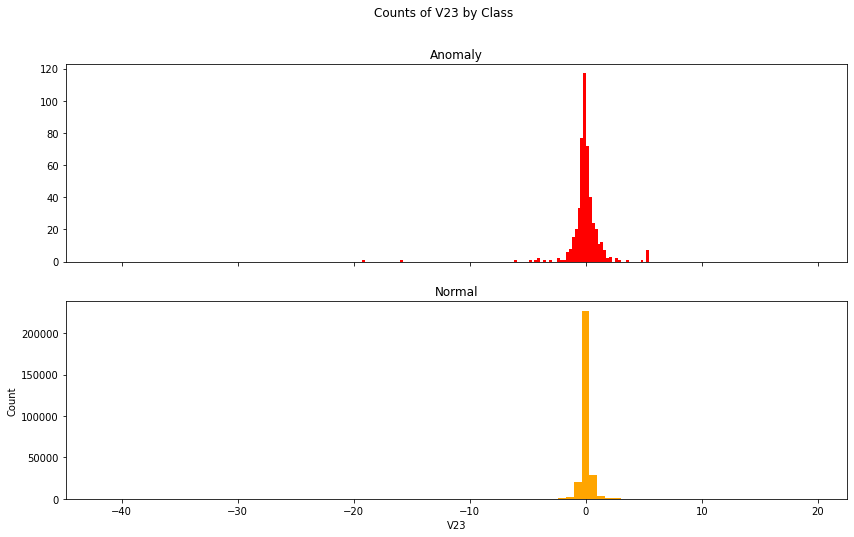

V24 Counts


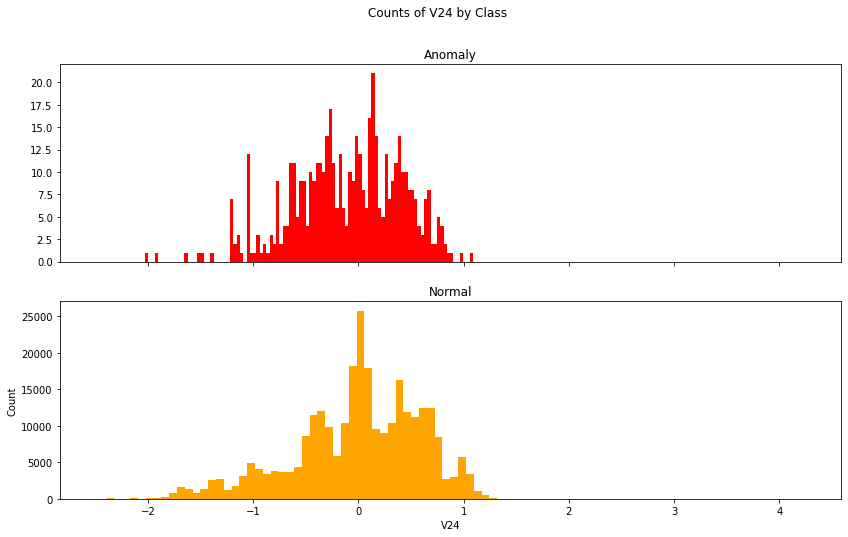

V25 Counts


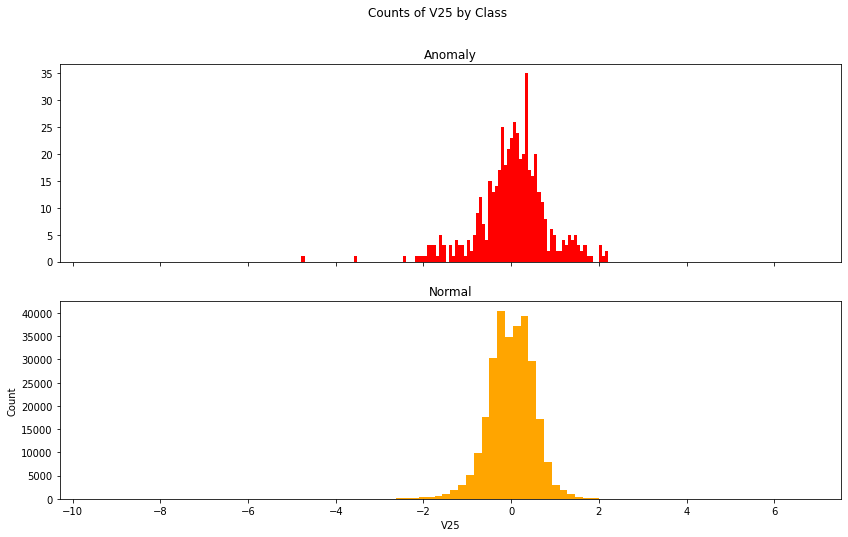

V26 Counts


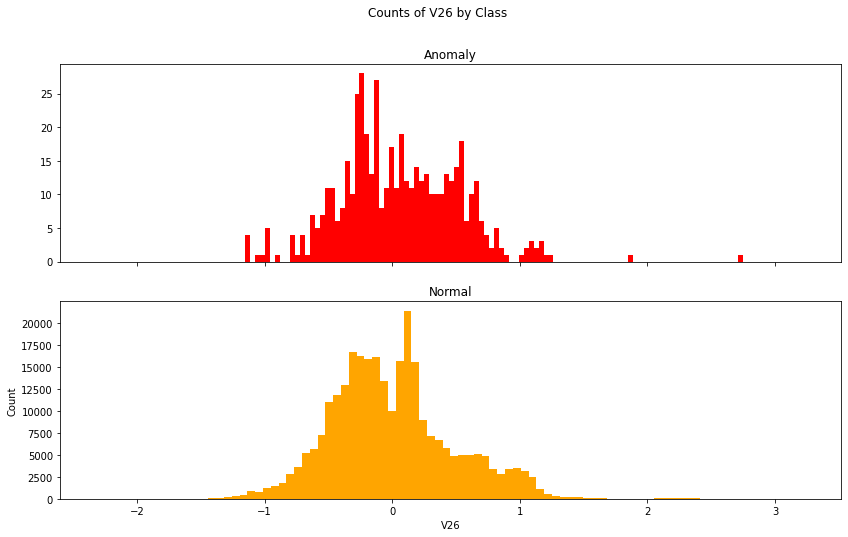

V27 Counts


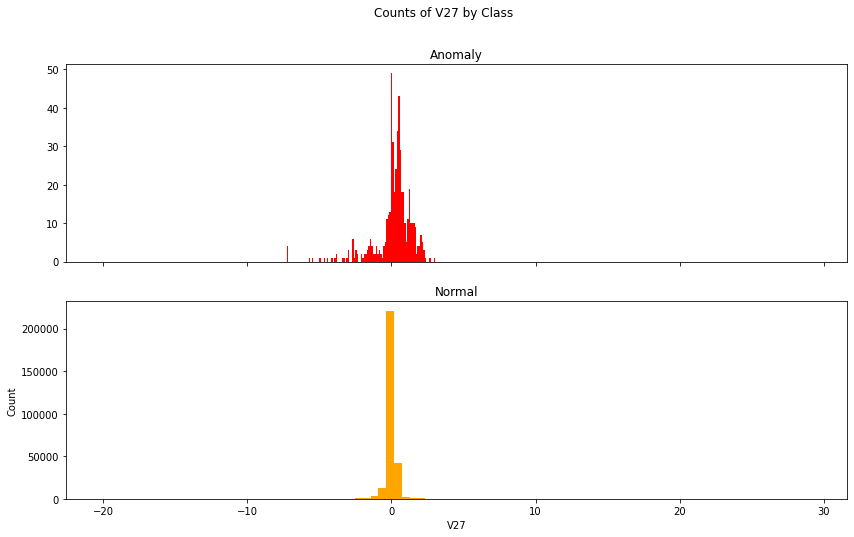

V28 Counts


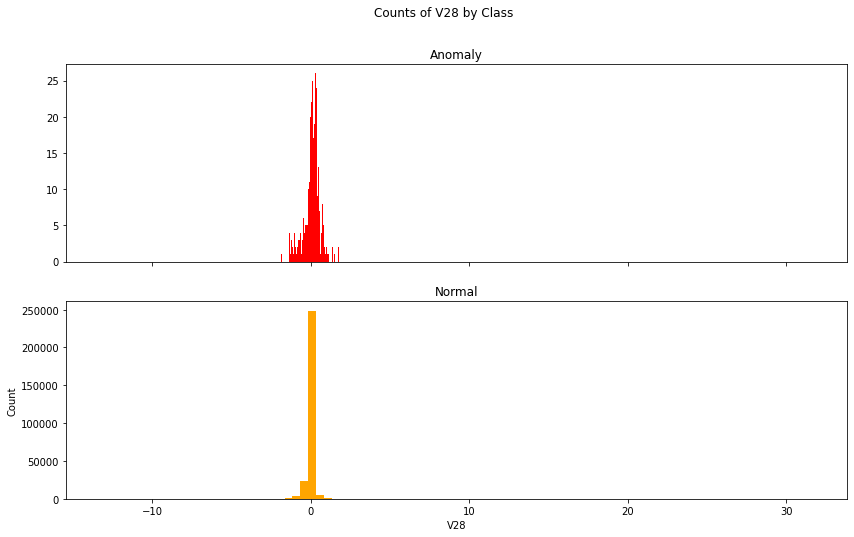

In [35]:
for f in range(1, 29):
    print(f'V{f} Counts')
    plot_histogram(df, bins, f'V{f}')

V1 vs Time


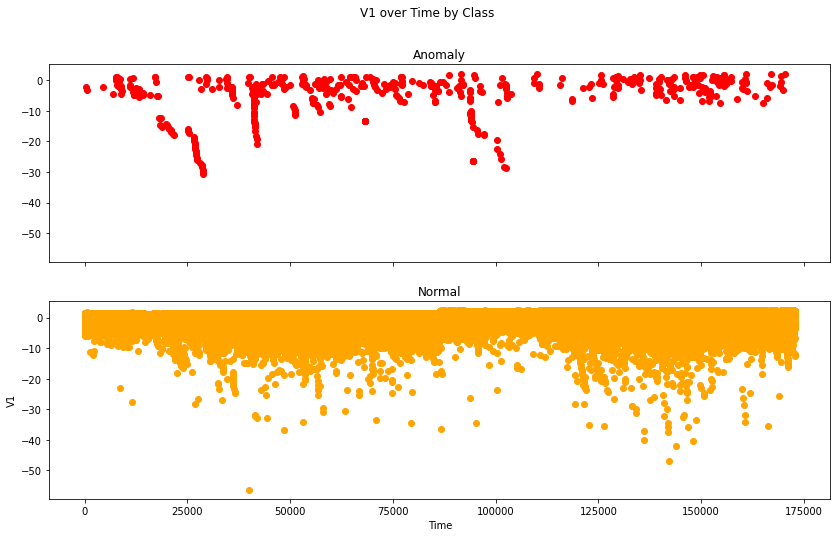

V2 vs Time


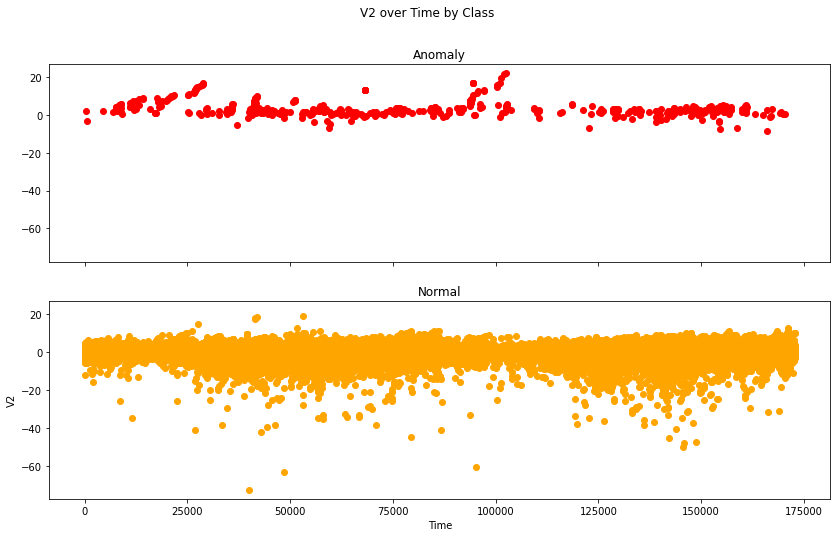

V3 vs Time


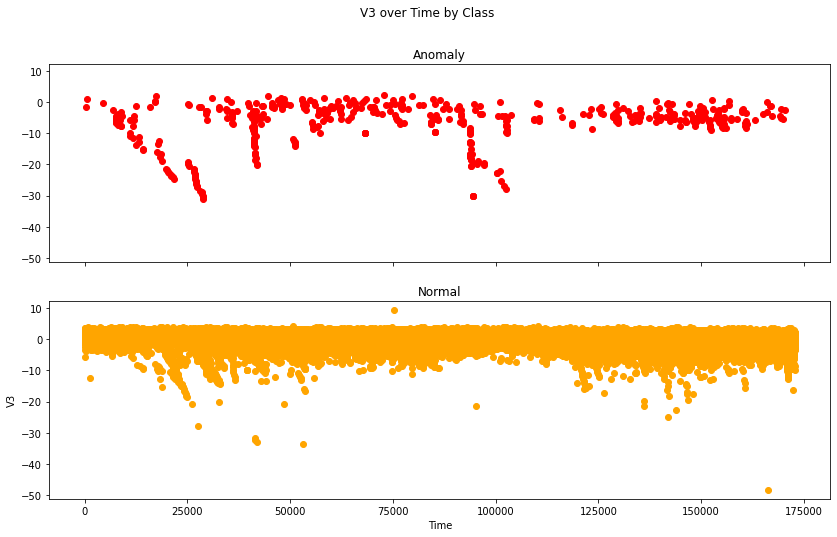

V4 vs Time


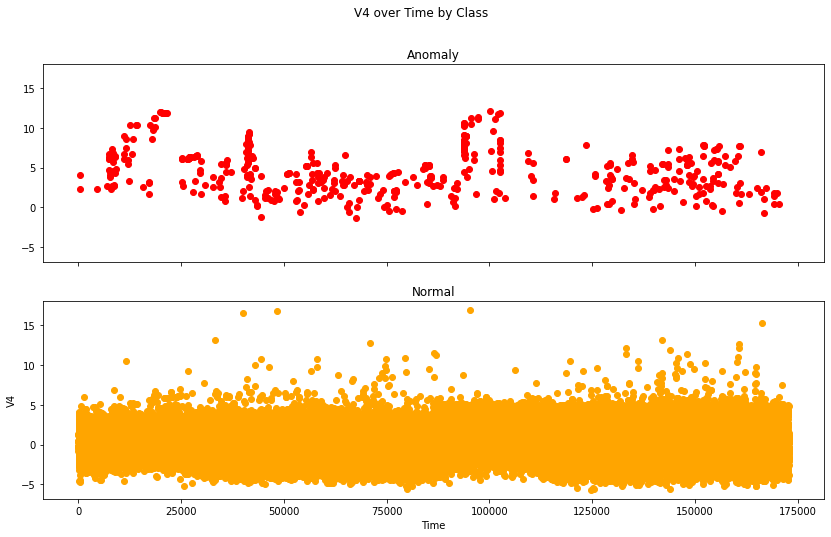

V5 vs Time


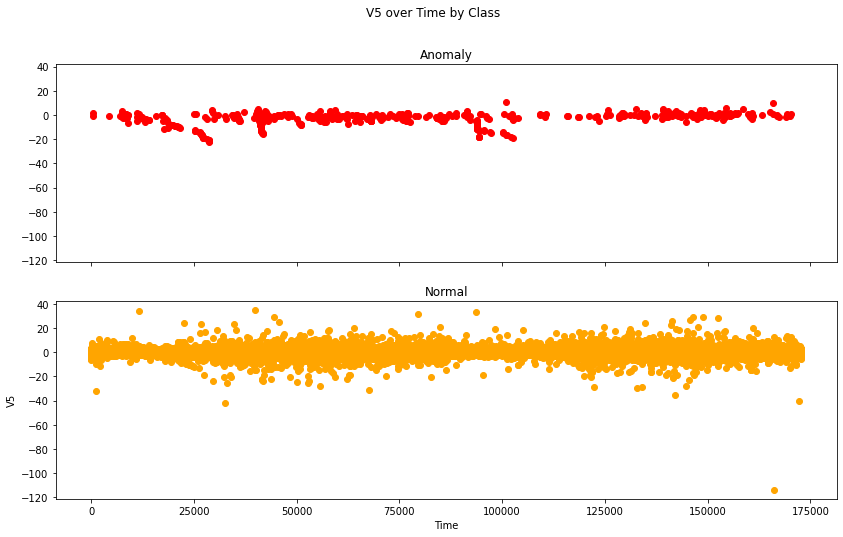

V6 vs Time


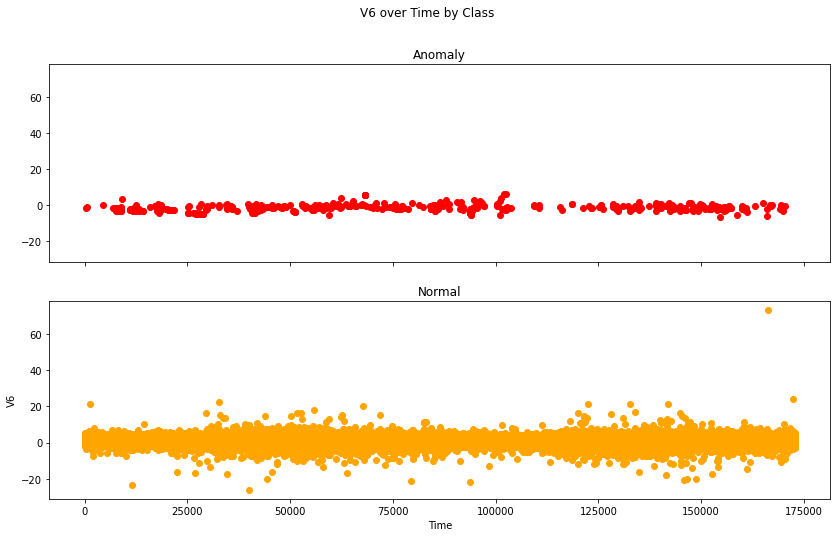

V7 vs Time


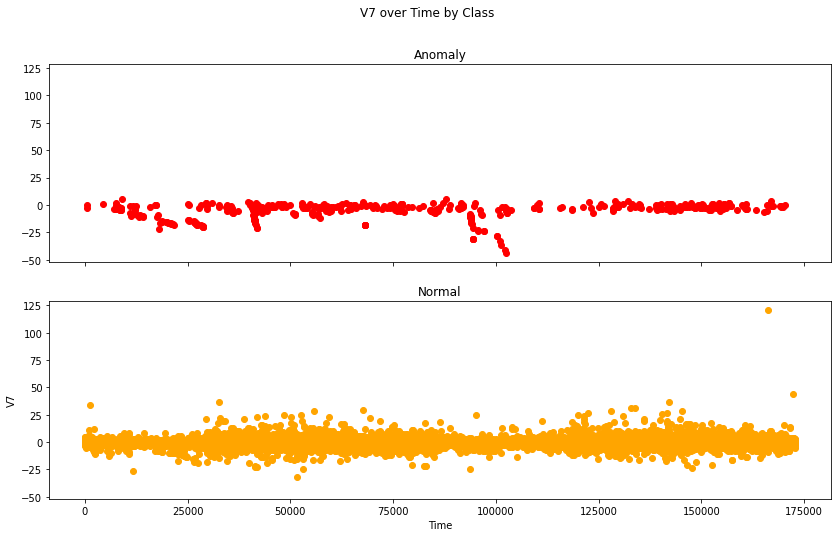

V8 vs Time


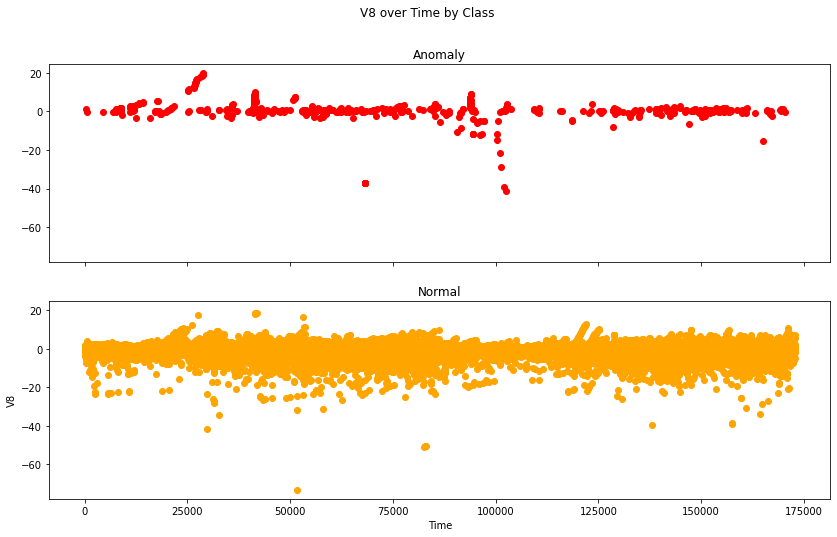

V9 vs Time


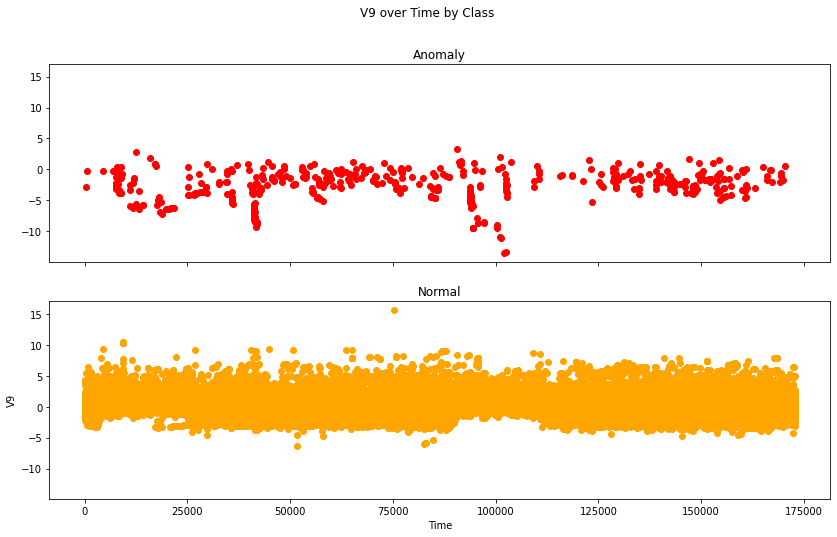

V10 vs Time


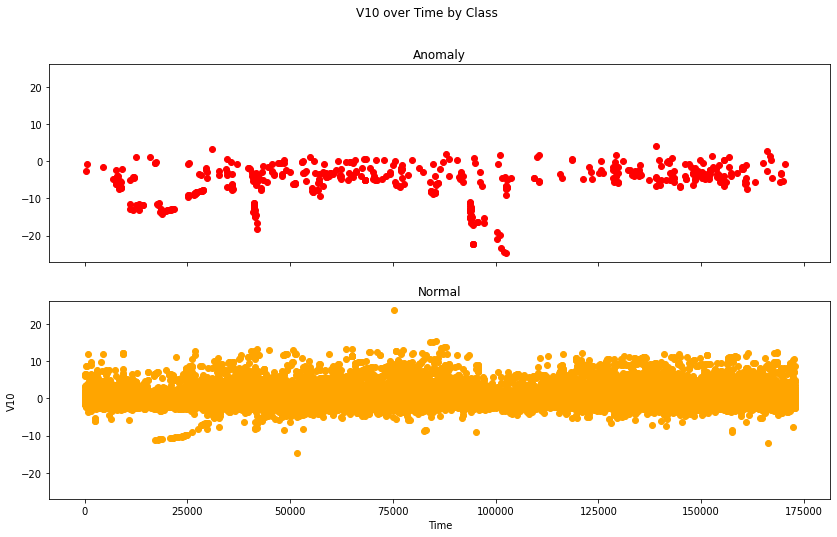

V11 vs Time


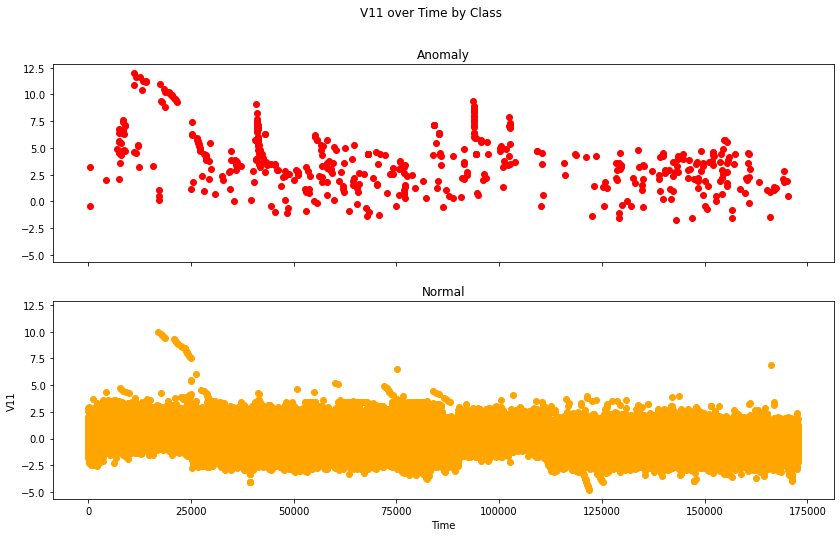

V12 vs Time


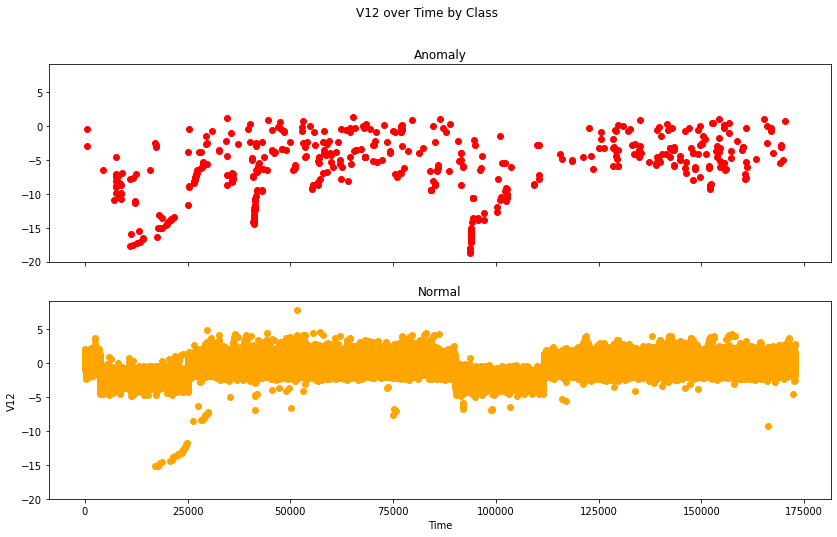

V13 vs Time


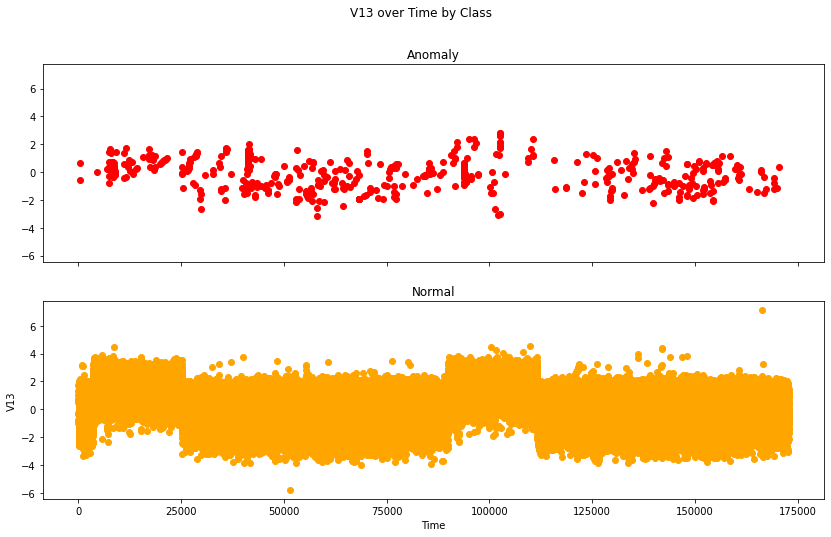

V14 vs Time


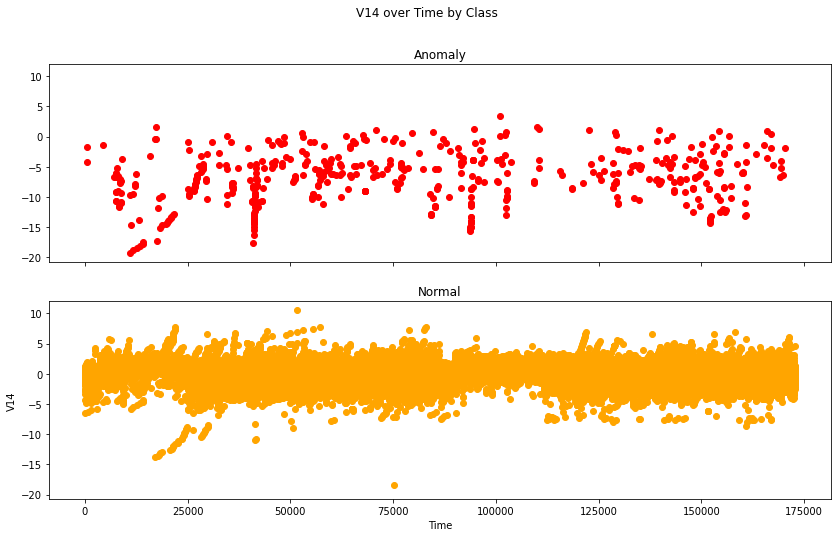

V15 vs Time


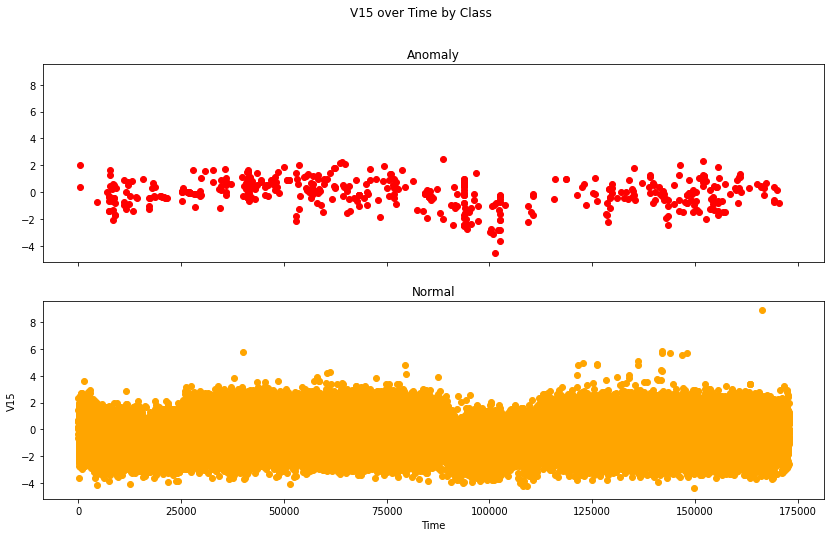

V16 vs Time


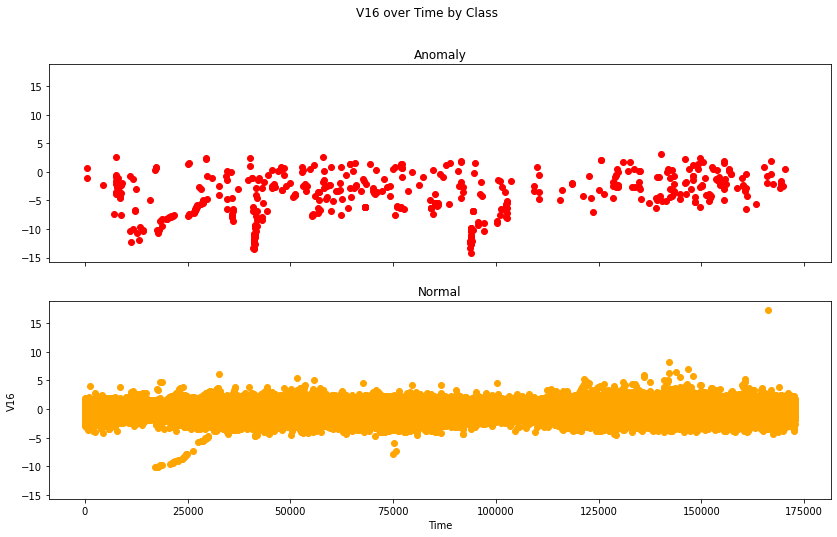

V17 vs Time


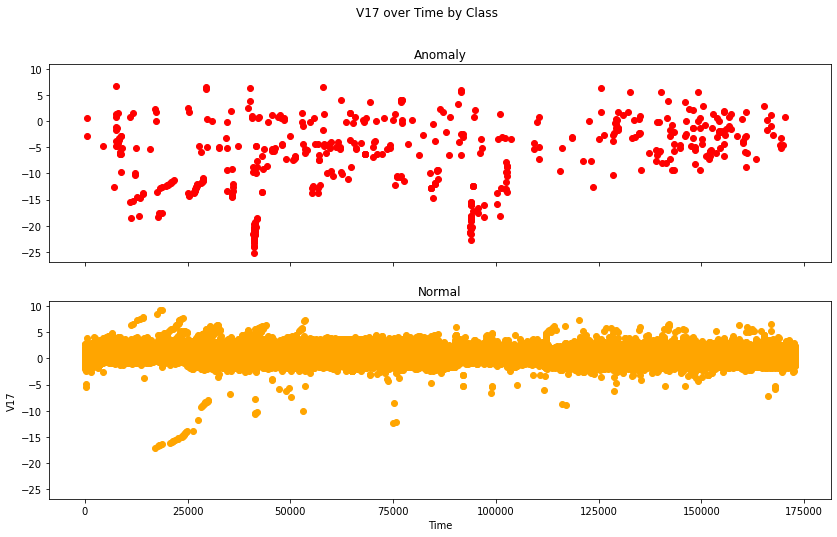

V18 vs Time


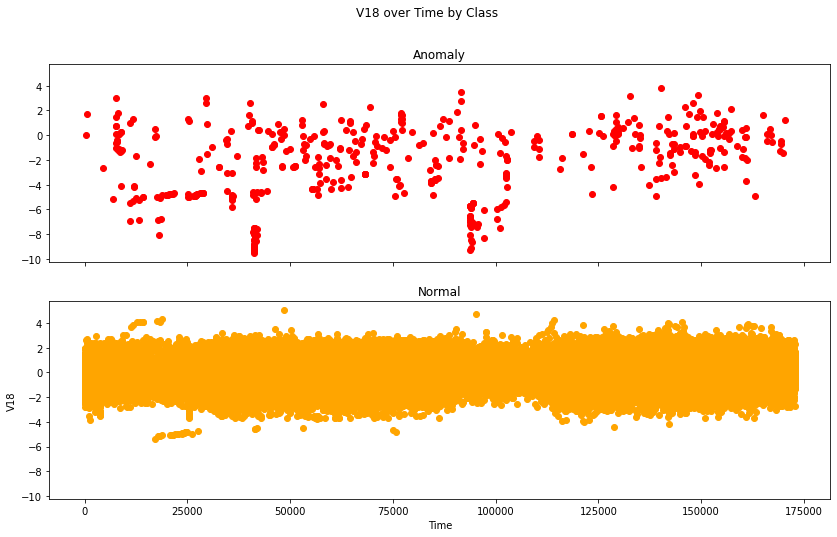

V19 vs Time


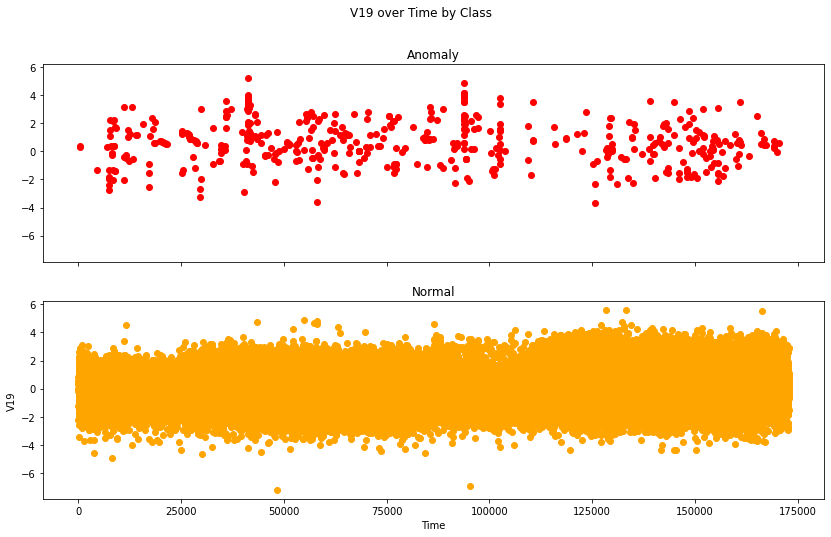

V20 vs Time


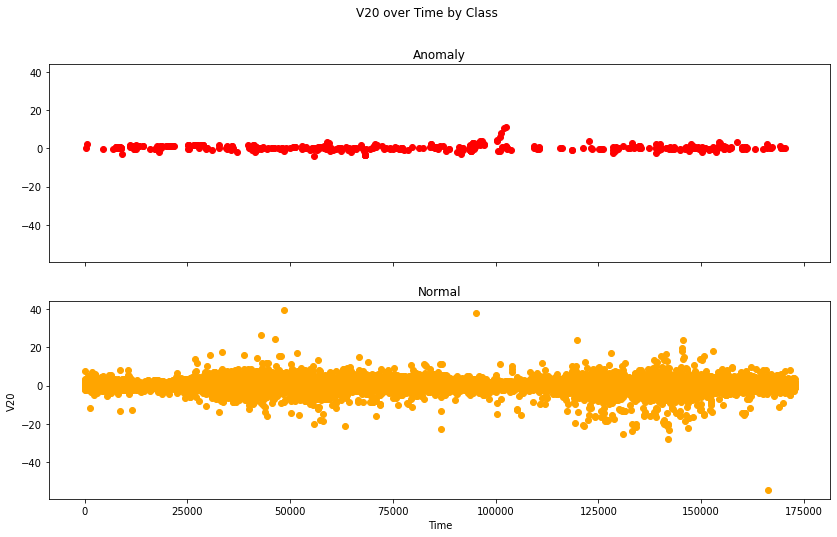

V21 vs Time


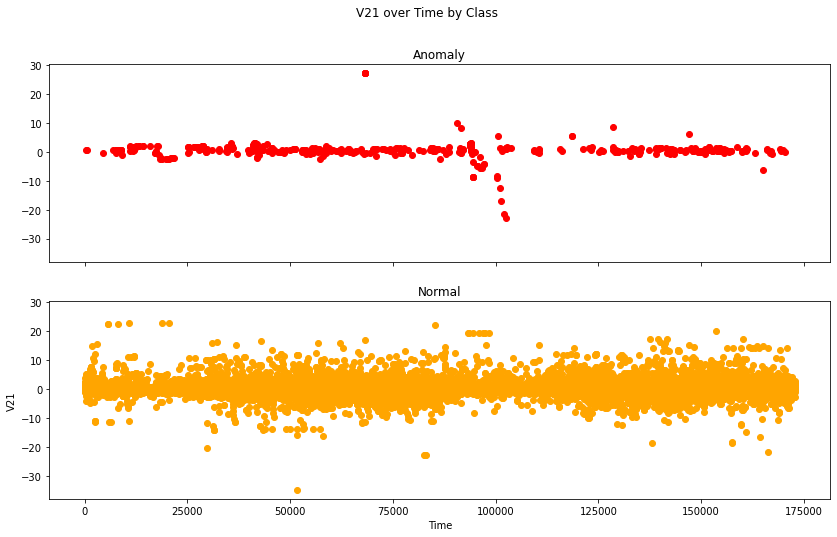

V22 vs Time


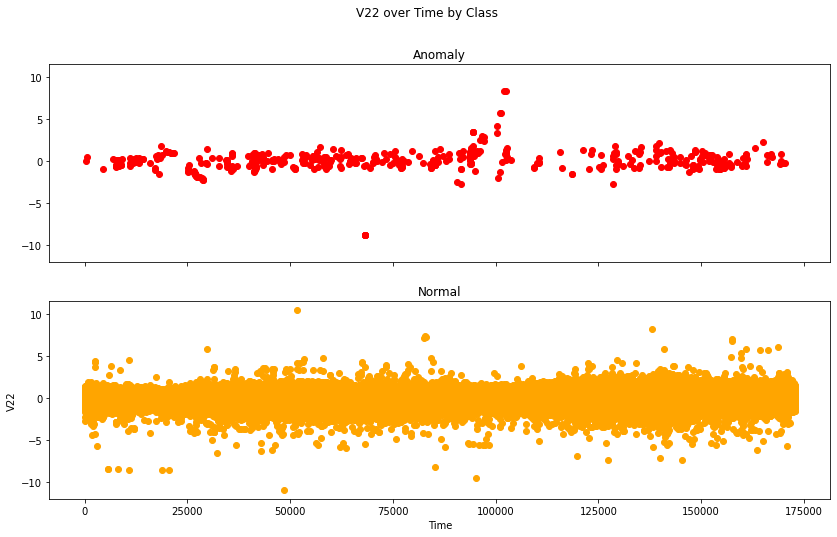

V23 vs Time


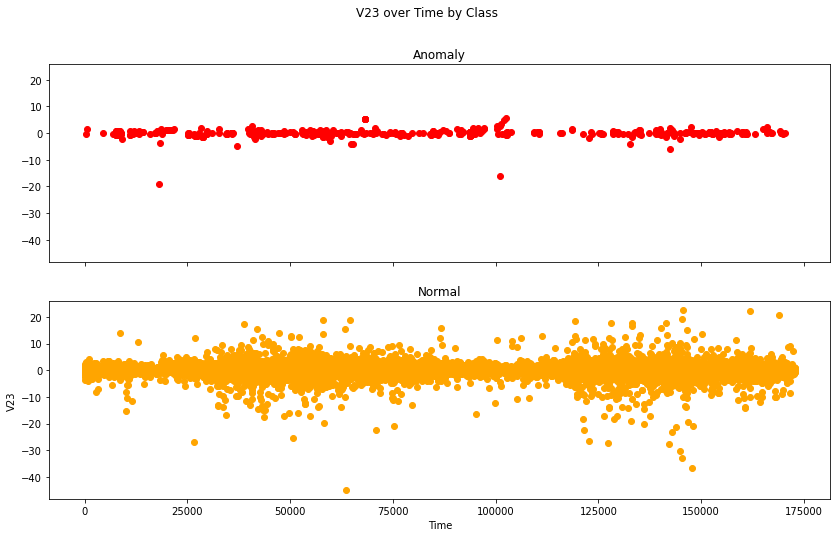

V24 vs Time


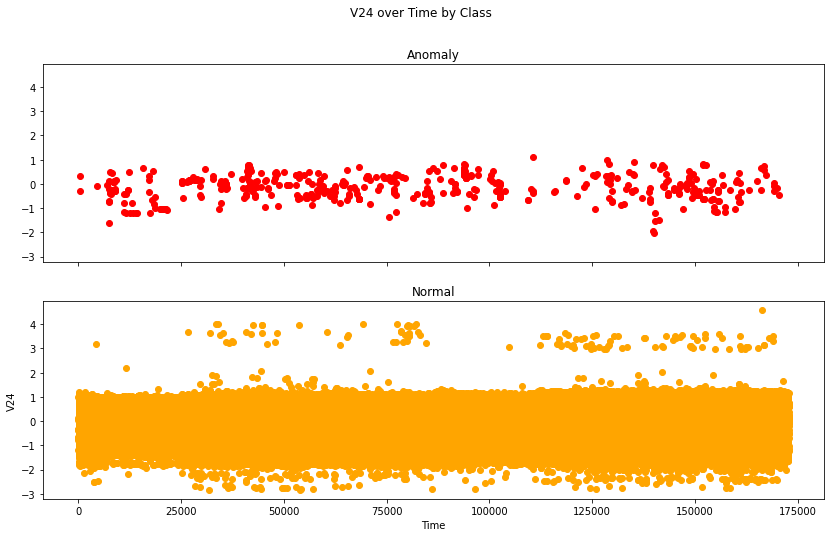

V25 vs Time


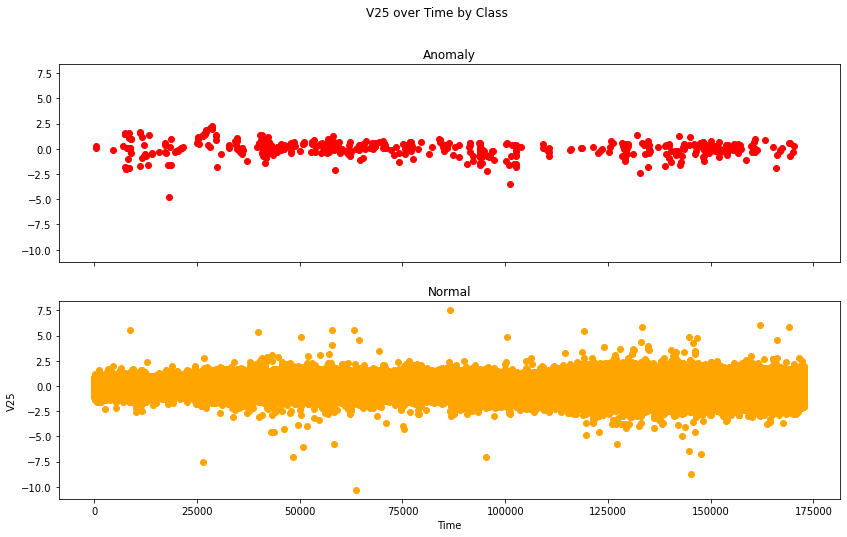

V26 vs Time


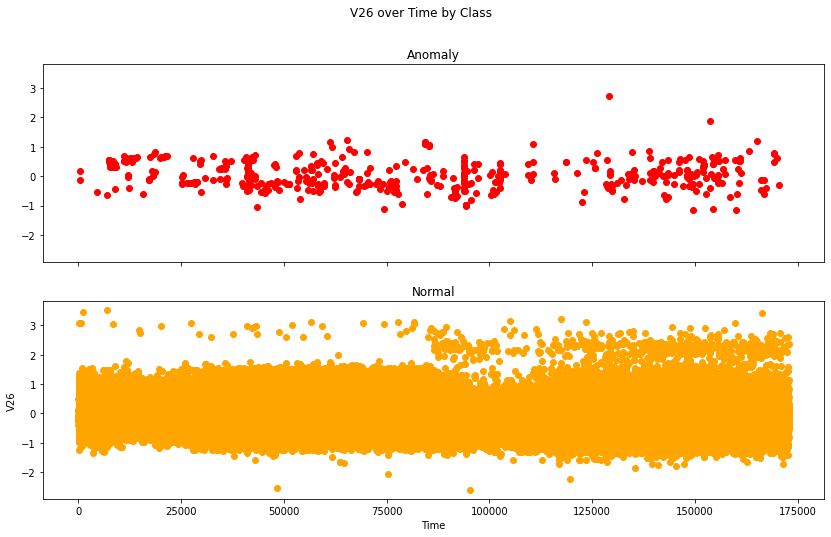

V27 vs Time


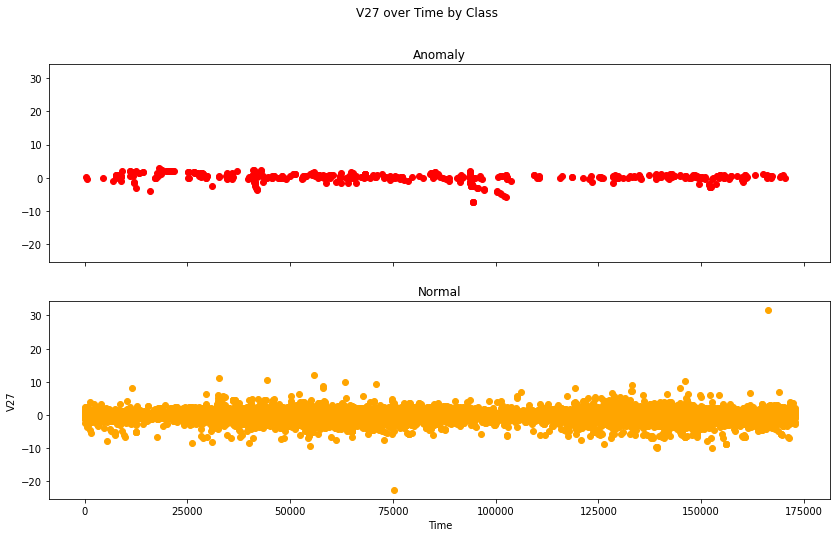

V28 vs Time


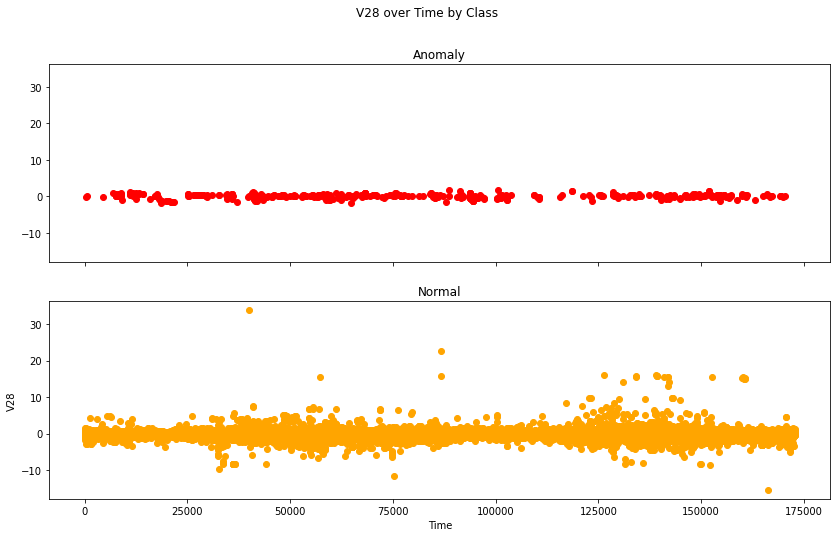

In [37]:
for f in range(1, 29):
    print(f'V{f} vs Time')
    plot_scatter(df, "Time", f'V{f}', sharey=True)  

Amount vs V1


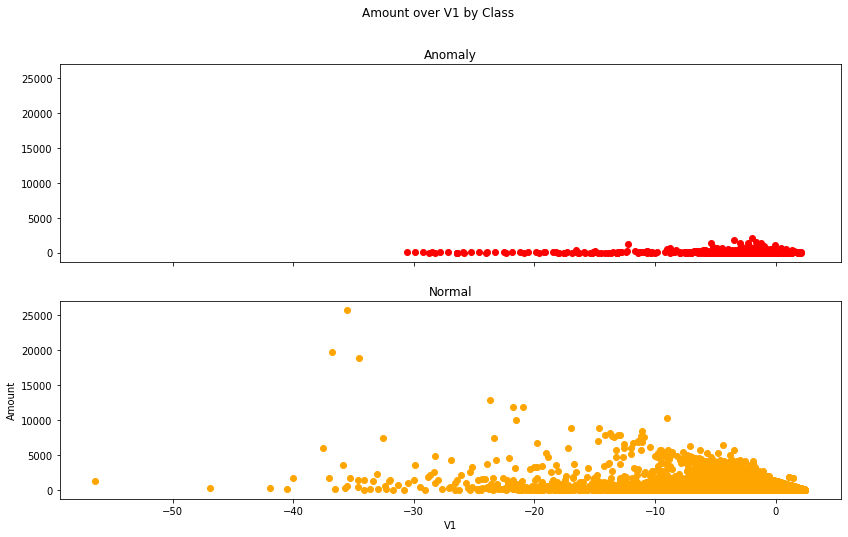

Amount vs V2


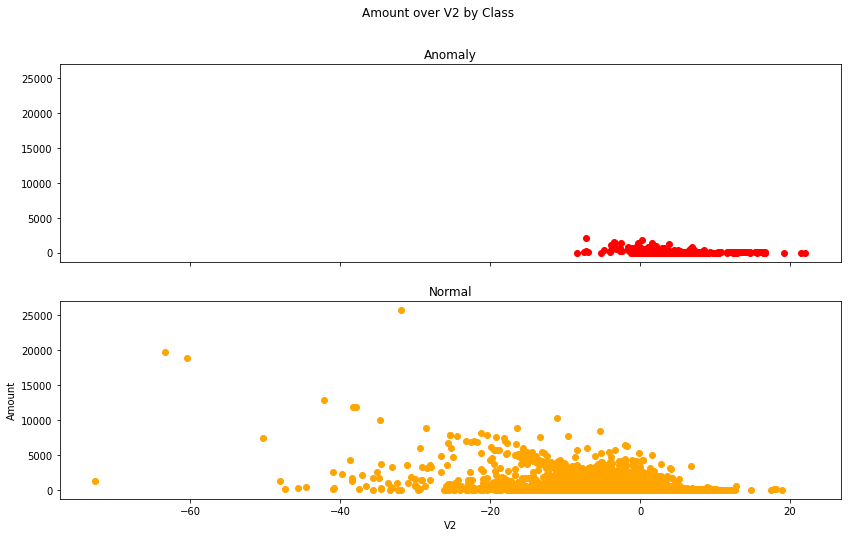

Amount vs V3


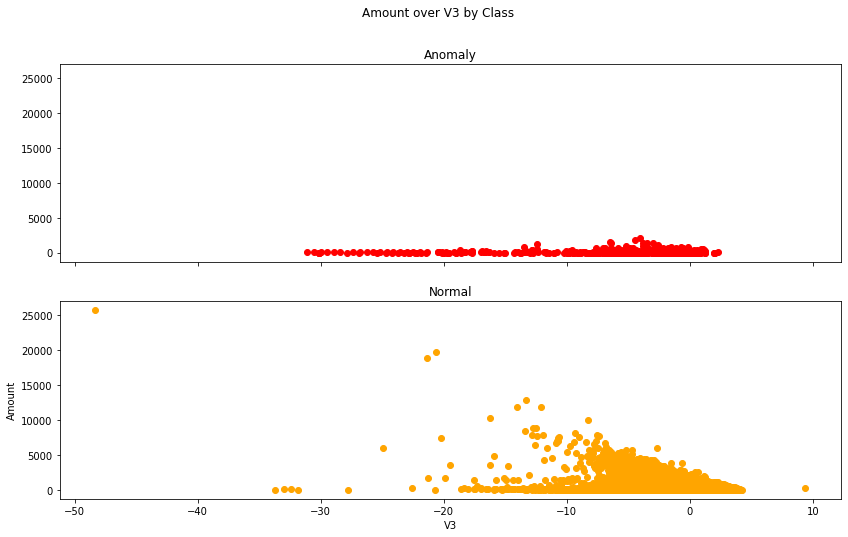

Amount vs V4


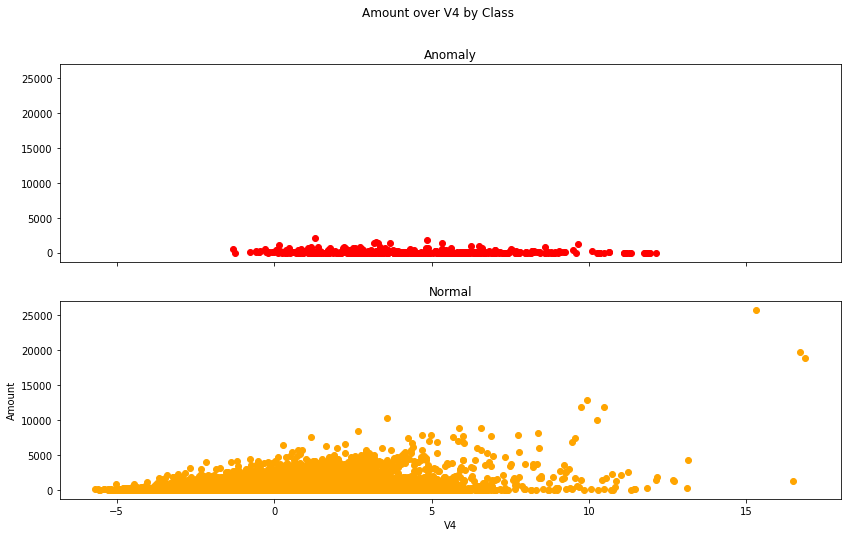

Amount vs V5


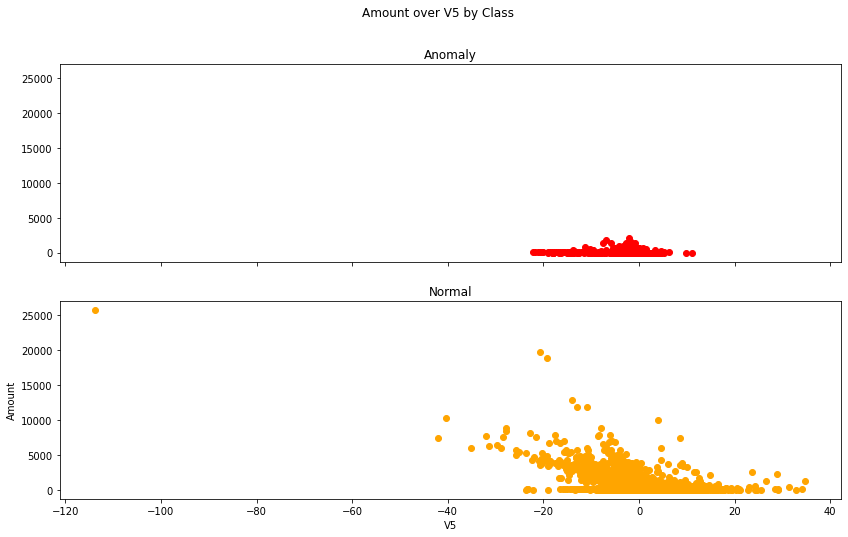

Amount vs V6


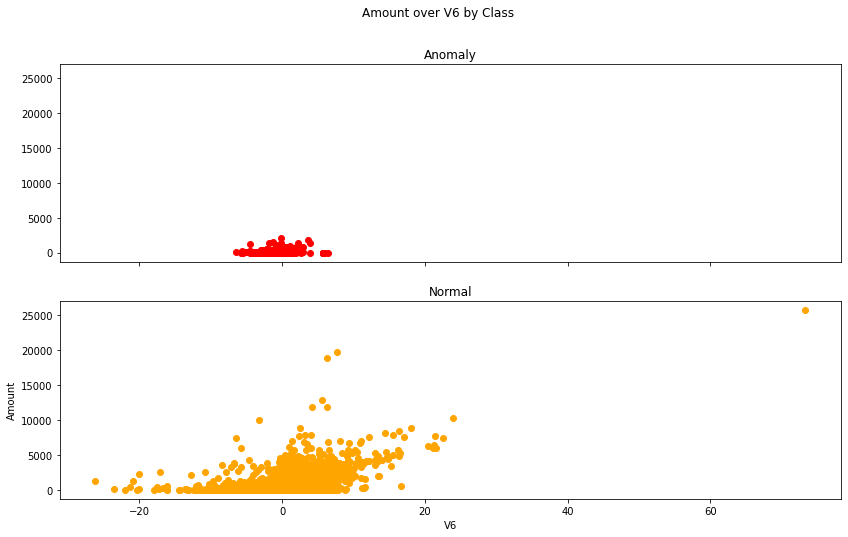

Amount vs V7


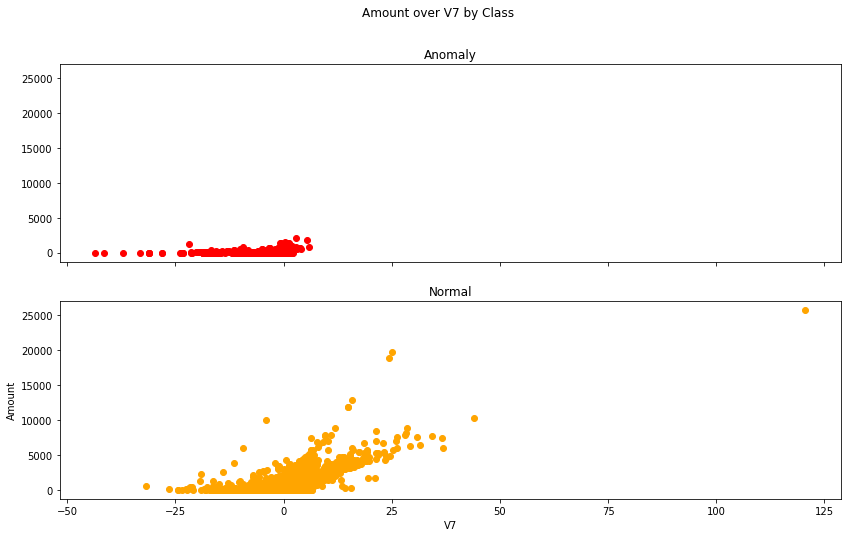

Amount vs V8


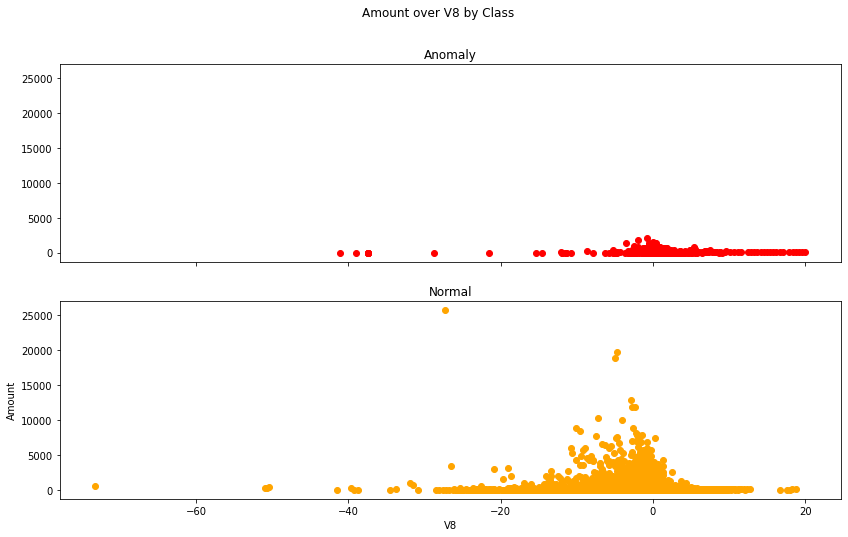

Amount vs V9


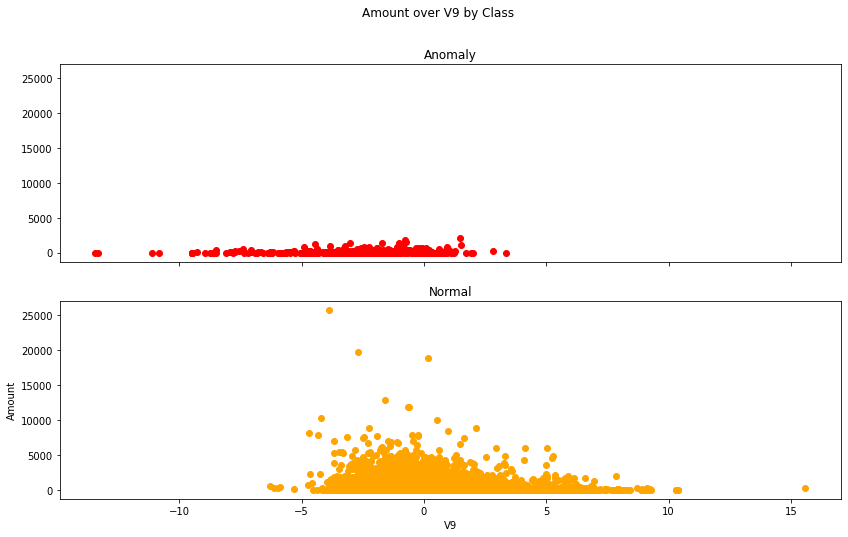

Amount vs V10


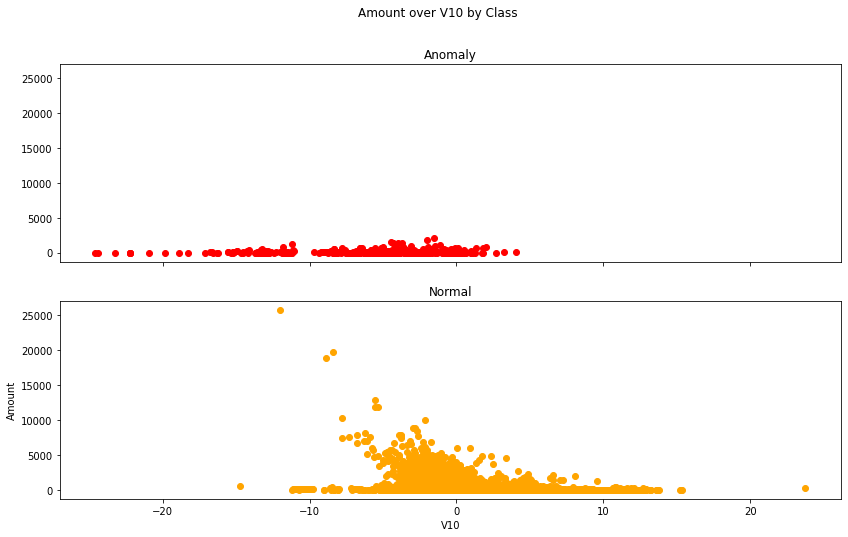

Amount vs V11


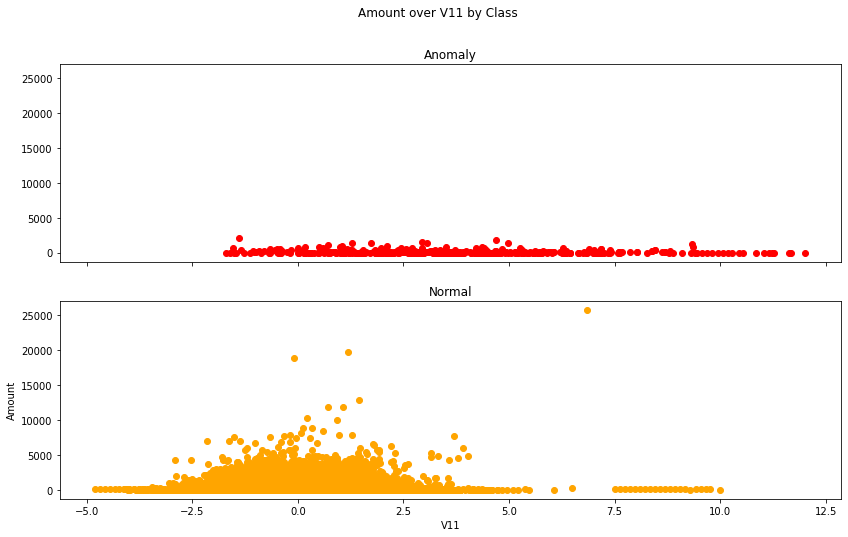

Amount vs V12


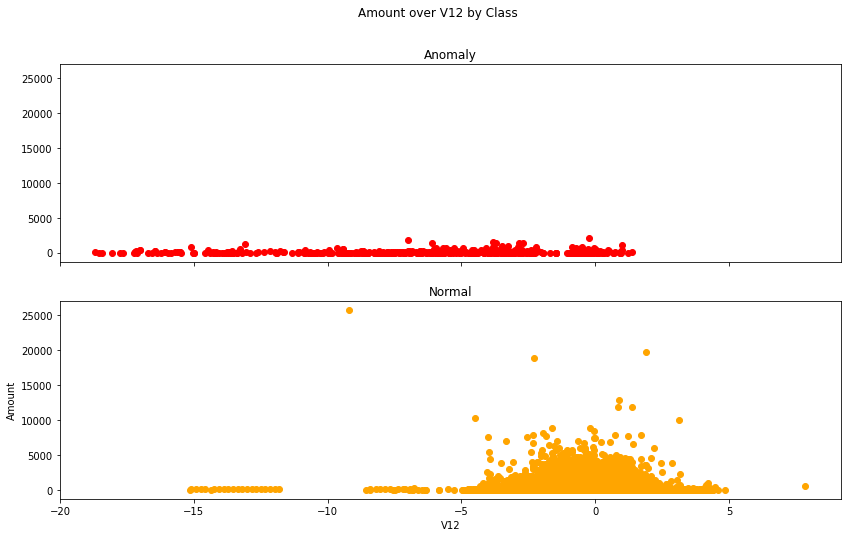

Amount vs V13


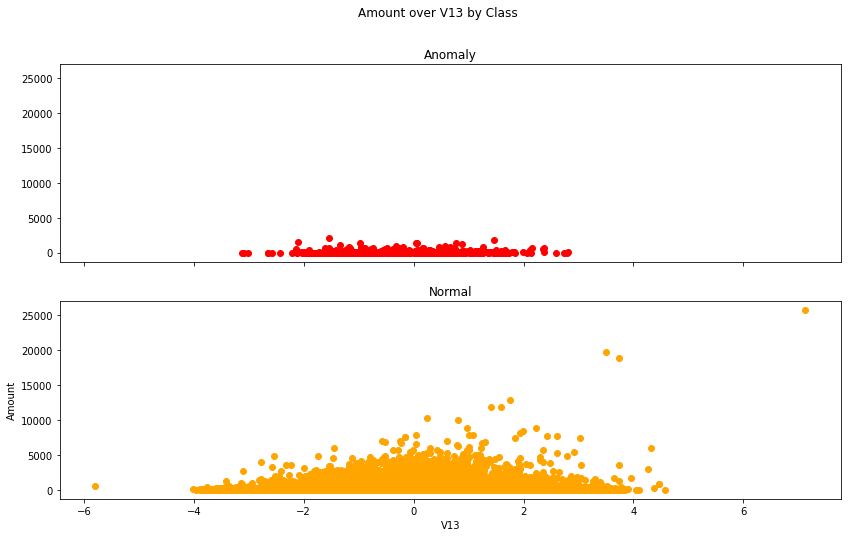

Amount vs V14


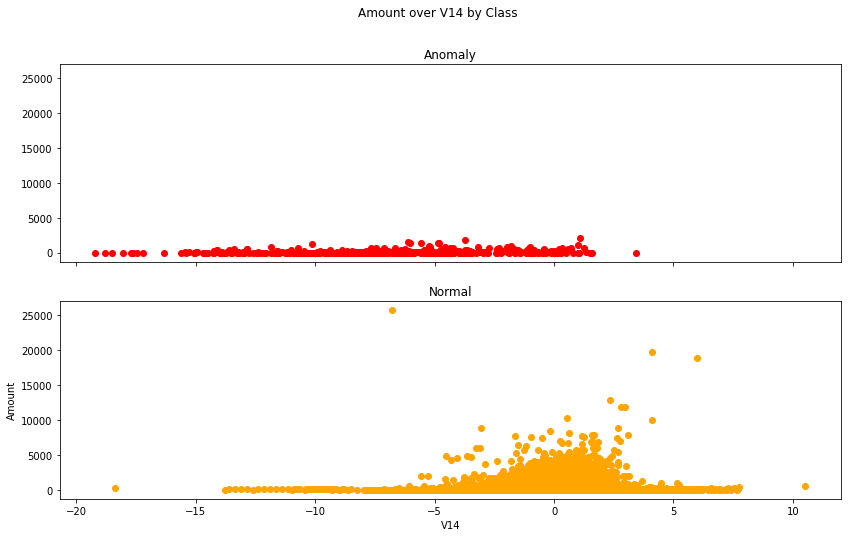

Amount vs V15


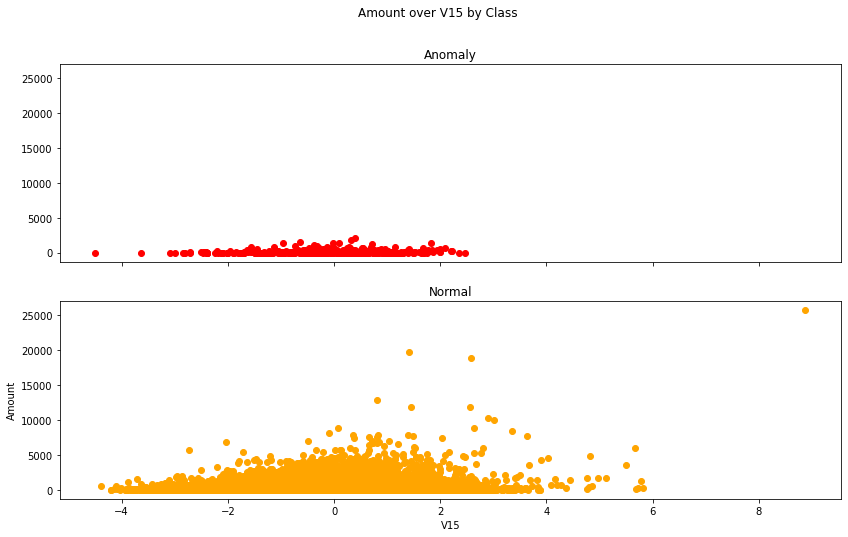

Amount vs V16


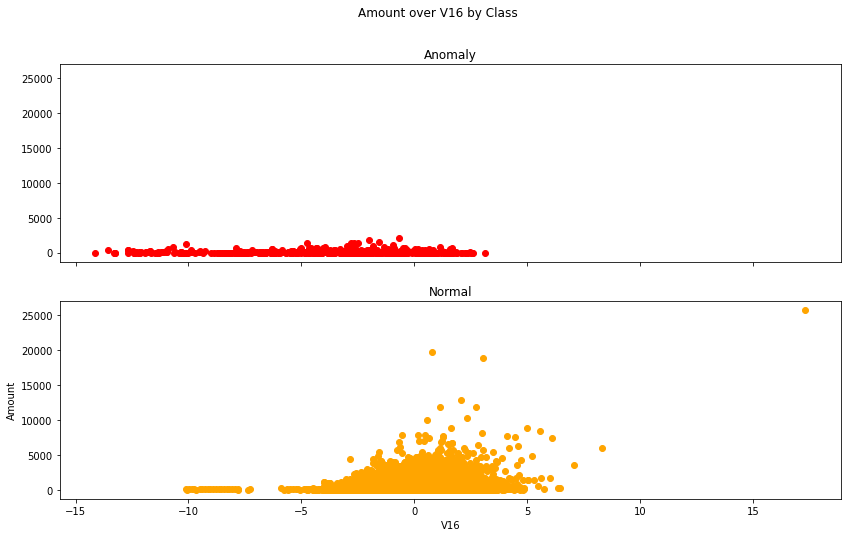

Amount vs V17


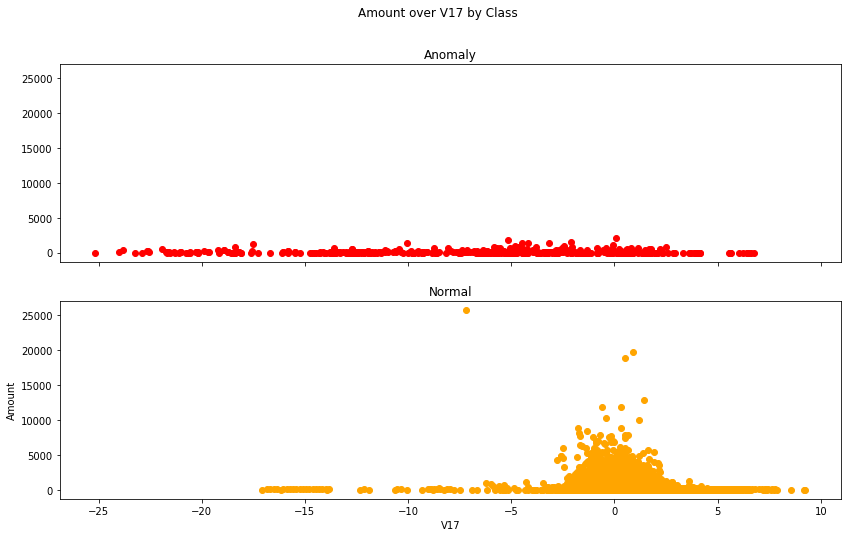

Amount vs V18


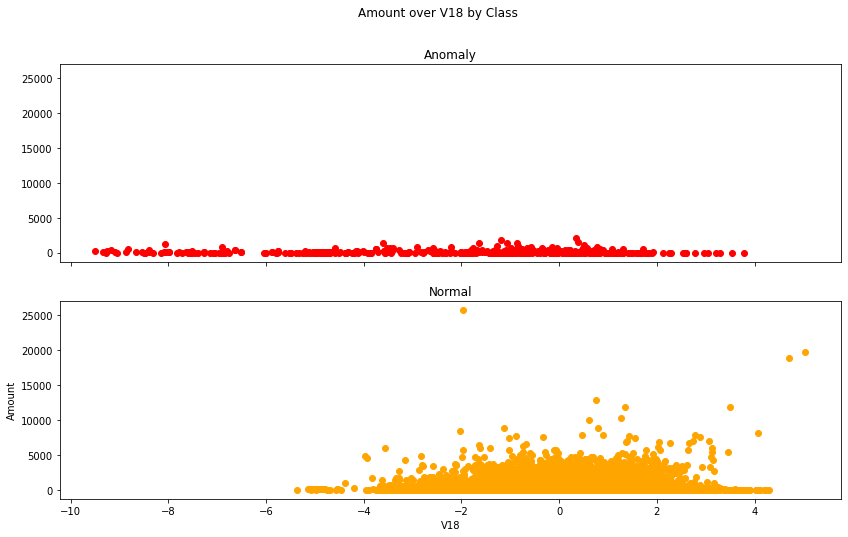

Amount vs V19


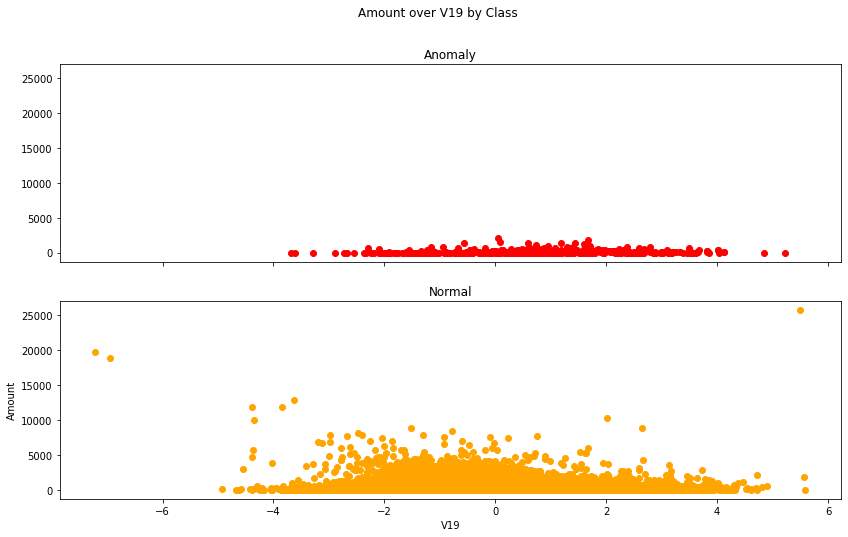

Amount vs V20


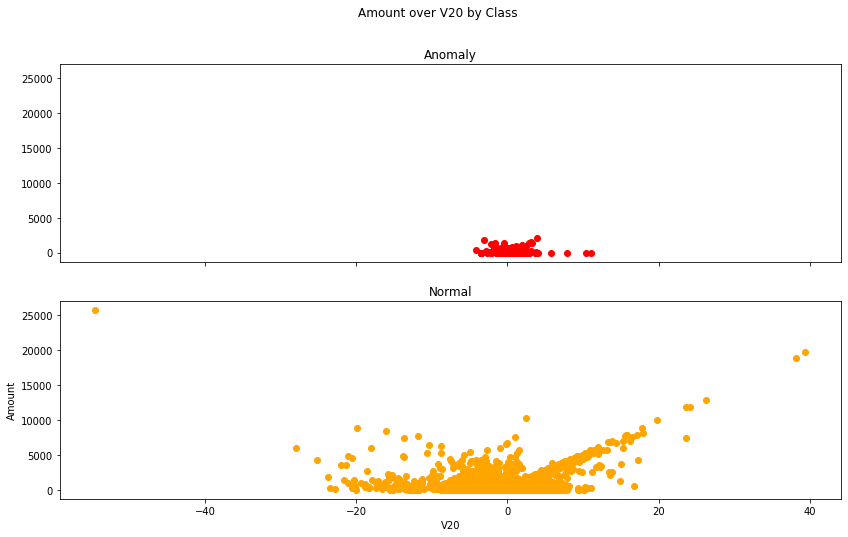

Amount vs V21


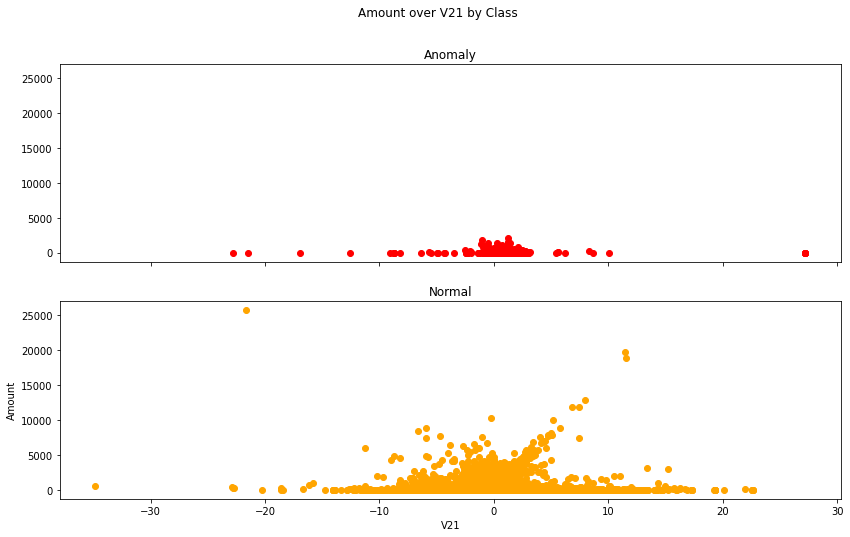

Amount vs V22


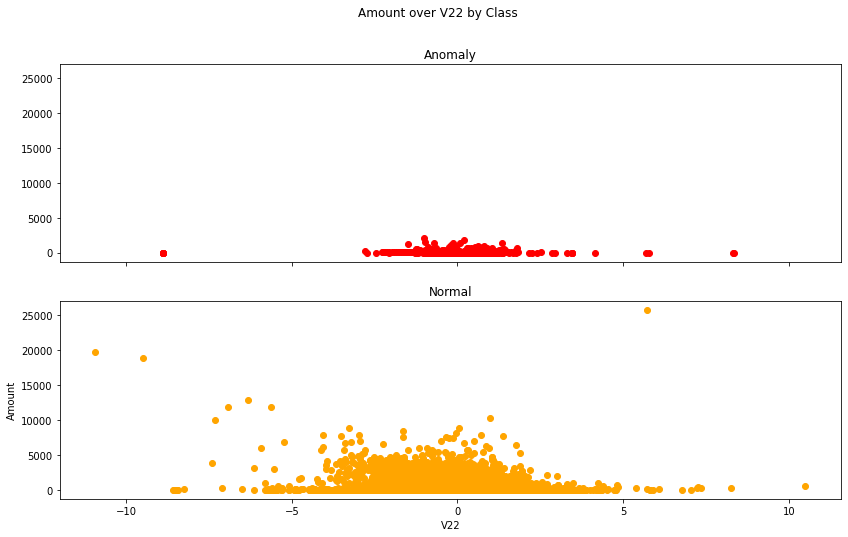

Amount vs V23


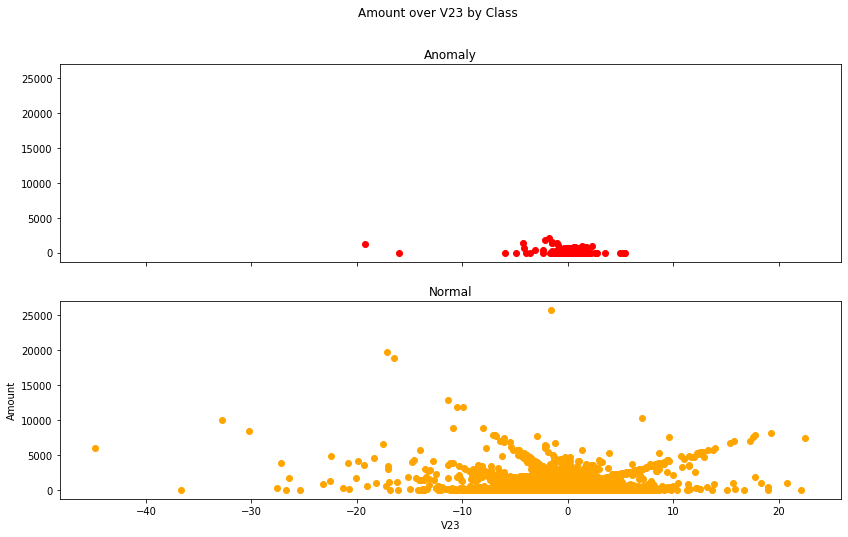

Amount vs V24


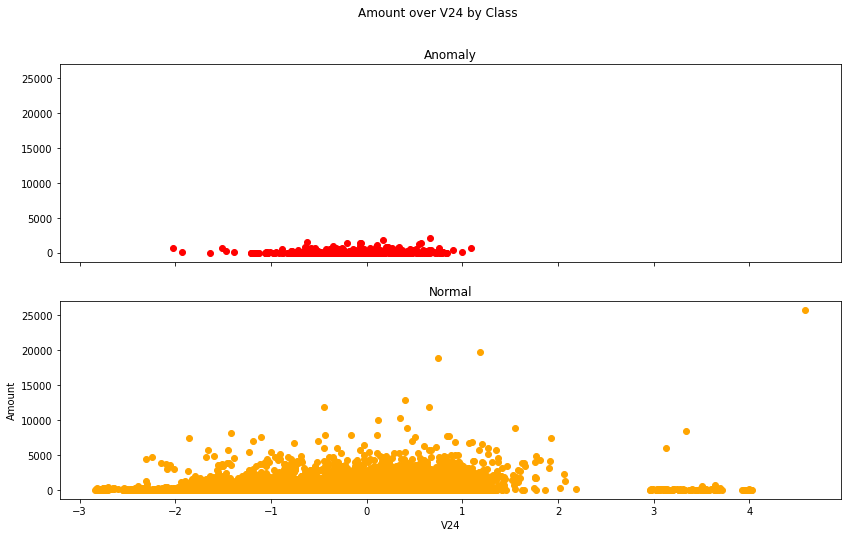

Amount vs V25


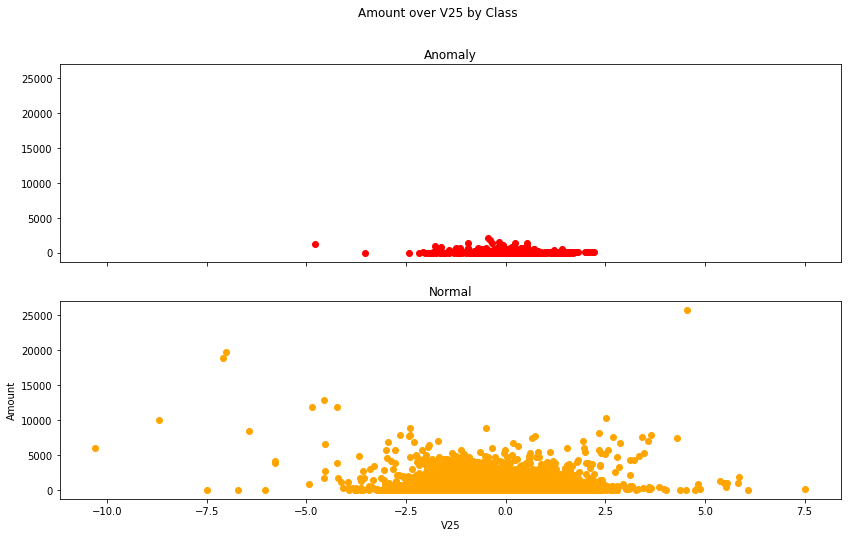

Amount vs V26


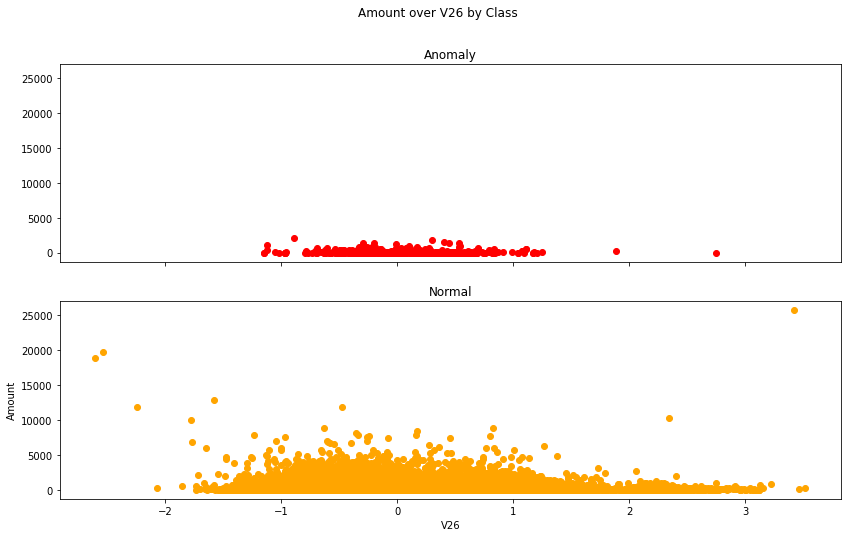

Amount vs V27


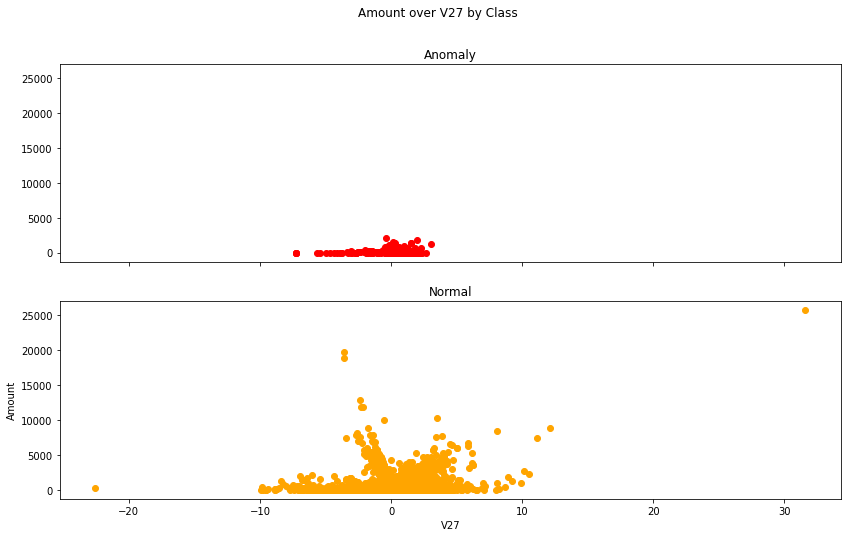

Amount vs V28


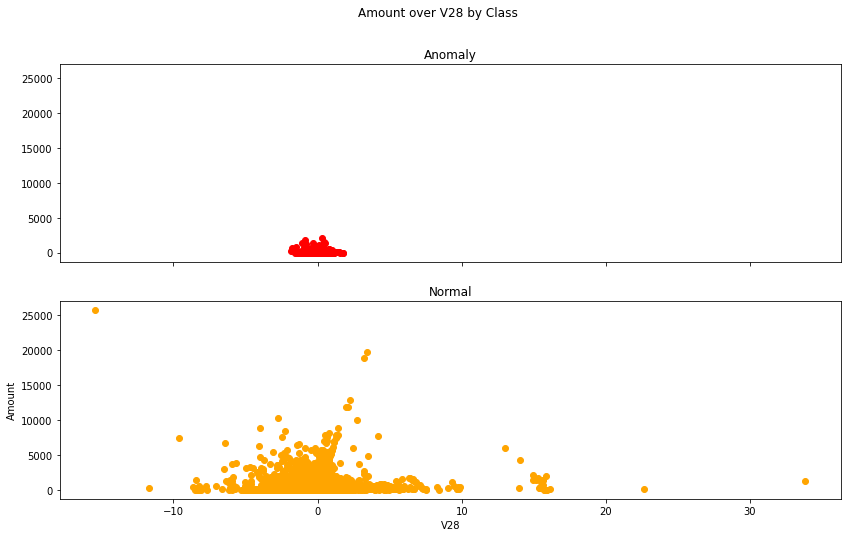

In [38]:
for f in range(1, 29):
    print(f'Amount vs V{f}')
    plot_scatter(df, f'V{f}', "Amount", sharey=True)